# Imports

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from   IPython.core.display import display, HTML

sns.set()

C:\Users\brcalazans\AppData\Local\Temp\ipykernel_40656\156461378.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from   IPython.core.display import display, HTML


# Help Functions

# Load Data

## Dados Exportação

In [2]:
df_exp_espumante = pd.read_csv('datasets/tech-challenge/content/ExpEspumantes.csv', delimiter=";")
df_exp_suco      = pd.read_csv('datasets/tech-challenge/content/ExpSuco.csv', delimiter=";")
df_exp_uva       = pd.read_csv('datasets/tech-challenge/content/ExpUva.csv', delimiter=";")
df_exp_vinho     = pd.read_csv('datasets/tech-challenge/content/ExpVinho.csv', delimiter=";")

## Dados Importação

In [3]:
df_imp_espumante = pd.read_csv('datasets/tech-challenge/content/ImpEspumantes.csv', delimiter=";")
df_imp_frescas   = pd.read_csv('datasets/tech-challenge/content/ImpFrescas.csv', delimiter=";")
df_imp_passas    = pd.read_csv('datasets/tech-challenge/content/ImpPassas.csv', delimiter=";")
df_imp_suco      = pd.read_csv('datasets/tech-challenge/content/ImpSuco.csv', delimiter=";")
df_imp_vinho     = pd.read_csv('datasets/tech-challenge/content/ImpVinhos.csv', delimiter=";")

# Análise Exploratória de Dados

## Tratamento dos Dados

### Tratamento Exportação

In [4]:
colunas = df_exp_vinho.columns[-30:]
colunas = colunas.insert(0, df_exp_vinho.columns[1])

In [5]:
df_exp_espumante = df_exp_espumante[colunas]
df_exp_suco      = df_exp_suco[colunas]
df_exp_uva       = df_exp_uva[colunas]
df_exp_vinho     = df_exp_vinho[colunas]

In [6]:
df_exp_espumante['Produto'] = 'Espumante'
df_exp_suco['Produto']      = 'Suco'
df_exp_uva['Produto']       = 'Uva'
df_exp_vinho['Produto']     = 'Vinho'

In [7]:
df_exp_geral = pd.concat([df_exp_espumante, df_exp_suco, df_exp_uva, df_exp_vinho], ignore_index=True)

In [8]:
new_columns_name = []
for col in df_exp_geral.columns:
    if str(col) == 'País':
        new_columns_name.append(col)
        
    if str(col).endswith(".1"):
        new_columns_name.append(str(col).replace(".1", " KG"))
        
    elif not str(col).endswith(".1") and not str(col) == "País":
        new_columns_name.append(str(col).replace(".1", " US$"))

In [9]:
df_exp_geral.columns = new_columns_name

### Tratamento Importação

In [10]:
colunas = df_imp_espumante.columns[-30:]
colunas = colunas.insert(0, df_imp_espumante.columns[1])

In [11]:
df_imp_espumante = df_imp_espumante[colunas]
df_imp_frescas   = df_imp_frescas[colunas]
df_imp_passas    = df_imp_passas[colunas]
df_imp_suco      = df_imp_suco[colunas]
df_imp_vinho     = df_imp_vinho[colunas]

In [12]:
df_imp_espumante['Produto'] = 'Espumante'
df_imp_frescas['Produto']   = 'Frescas'
df_imp_passas['Produto']    = 'Passas'
df_imp_suco['Produto']      = 'Suco'
df_imp_vinho['Produto']     = 'Vinho'

In [13]:
df_imp_geral = pd.concat([df_imp_espumante, df_imp_frescas, df_imp_passas, df_imp_suco, df_imp_vinho], ignore_index=True)

In [14]:
new_columns_name = []
for col in df_imp_geral.columns:
    if str(col) == 'País':
        new_columns_name.append(col)
        
    if str(col).endswith(".1"):
        new_columns_name.append(str(col).replace(".1", " KG"))
        
    elif not str(col).endswith(".1") and not str(col) == "País":
        new_columns_name.append(str(col).replace(".1", " US$"))

In [15]:
df_imp_geral.columns = new_columns_name

## Exploração dos Dados

### Exploração Exportação Geral

In [16]:
df_exp_geral.head(3)

,País,2007,2007 KG,2008,2008 KG,2009,2009 KG,2010,2010 KG,2011,...,2017 KG,2018,2018 KG,2019,2019 KG,2020,2020 KG,2021,2021 KG,Produto
0,Alemanha,3547,10192,5423,20928,6648,29018,1958,6877,1976,...,28799,4092,21373,1003,5466,2388,14767,142,265,Espumante
1,Angola,6293,26252,2244,10581,11393,33664,104138,672533,904,...,0,63,280,1007,3615,24,38,0,0,Espumante
2,Antigua e Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,7,34,32,328,10,82,Espumante


In [461]:
colunas_periodos_exportacao = df_exp_geral.columns[0::2].to_list()
#colunas_periodos_exportacao.insert(0, df_exp_geral.columns[0])

In [462]:
df_periodos_exportacao = df_exp_geral[colunas_periodos_exportacao].copy()

In [464]:
#df_periodos_exportacao = df_periodos_exportacao[df_periodos_exportacao.columns[1:]]

In [465]:
df_periodos_exportacao.set_index("País", inplace=True)

<Axes: >

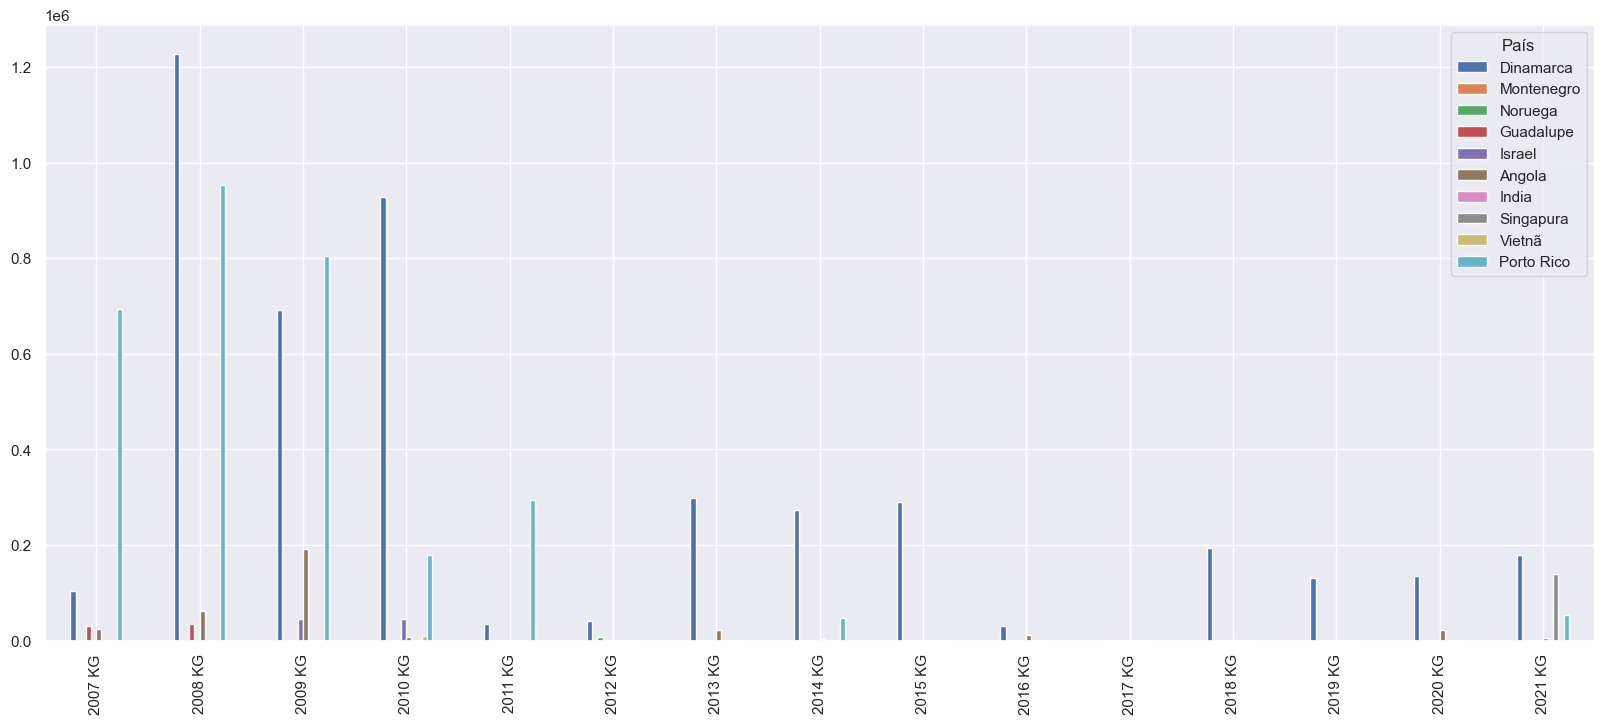

In [466]:
df_periodos_exportacao.sample(10).T.plot(kind='bar', figsize=(20,8))

### Exploração Importação

In [23]:
df_imp_geral.sort_values(by='2021', ascending=False).head(15)

,País,2007,2007 KG,2008,2008 KG,2009,2009 KG,2010,2010 KG,2011,...,2017 KG,2018,2018 KG,2019,2019 KG,2020,2020 KG,2021,2021 KG,Produto
138,Chile,18845522,47680946,18662626,50748373,22476643,61380795,26434744,72983389,26642889,...,145628860,51104825,144731210,52697108,145471294,72726186,176540499,69617587,182568098,Vinho
128,Argentina,15621172,36160548,14417761,37382581,13902750,38521731,16965266,52126581,16673491,...,51770842,15221318,52817642,16548931,54527380,22610267,66322932,26869241,79527959,Vinho
172,Portugal,6805601,23945522,6213781,23826443,5884719,23688318,7801759,29299792,8556375,...,45032247,17698831,53237413,18228699,51444189,23627260,66353572,25925363,75668823,Vinho
65,Argentina,15203133,19187668,15641645,26994373,17209323,24106889,17279688,34499504,20533473,...,34422405,23564519,43501396,24135143,48810789,24992502,36743996,24015825,33337604,Passas
156,Itália,9177932,22023175,9723292,24378627,8387908,23079424,11911190,28683242,12025827,...,33707111,10154564,34857594,10323254,33355982,9659999,32477890,11231625,39852162,Vinho
145,Espanha,862045,4506858,990697,6036397,1119540,6224187,1622100,8698824,1999970,...,19834451,5595268,19353631,5797980,17111436,7169384,19802061,8793911,23795616,Vinho
147,França,2737947,14721769,2466277,16275708,2372448,16893114,2799118,18778566,3329437,...,25280255,4653789,22688105,5324383,24299524,5658139,24894394,6241310,31428188,Vinho
45,Chile,7122019,7288258,3479598,4246892,10846054,12828213,11806542,17019296,18620819,...,29248621,16103415,25237521,9082957,13450429,4943446,6986630,3888723,5404163,Frescas
185,Uruguai,2387225,3131899,920389,2089539,750343,1953390,1219387,3175051,1264306,...,7751966,2836574,8467846,2778244,7938059,4079076,10146829,3788831,10063341,Vinho
16,Espanha,254317,1003934,266955,1179471,388452,1397582,512539,1904476,831585,...,5592839,1515106,5707839,1440241,4463736,1421655,3871128,2016806,5732174,Espumante


In [24]:
df_imp_geral.head(3)

,País,2007,2007 KG,2008,2008 KG,2009,2009 KG,2010,2010 KG,2011,...,2017 KG,2018,2018 KG,2019,2019 KG,2020,2020 KG,2021,2021 KG,Produto
0,Africa do Sul,90,1073,9212,30630,10381,42463,8121,37035,20213,...,23919,15368,74800,17583,72077,3574,14542,6980,36677,Espumante
1,Alemanha,1980,11786,1959,12516,1170,8434,1116,5753,810,...,37116,18376,82273,26853,169989,21174,65359,19977,46237,Espumante
2,Argentina,556320,1441196,1015357,3094003,894550,2730102,1086901,3583463,997492,...,2249681,706478,2462909,757716,2282614,469547,1304986,723847,2211657,Espumante


### Exploração Exportação Vinho

#### Quantidade de Vinho Exportado

In [472]:
##Construção da tabela solicitada pelo Head - País de Origem(Brasil), País de Destino, Qtd em Litros de Vinho(1kg = 1l) e Valor em US$.
df_exp_vinho_tabela_final = df_exp_vinho.copy()

In [473]:
df_exp_vinho_tabela_final.drop(columns=["Produto"], inplace=True)

In [475]:
df_exp_vinho_tabela_final.set_index("País", inplace=True)

In [479]:
df_exp_vinho_tabela_final.columns[1::2]

Index(['2007.1', '2008.1', '2009.1', '2010.1', '2011.1', '2012.1', '2013.1',
       '2014.1', '2015.1', '2016.1', '2017.1', '2018.1', '2019.1', '2020.1',
       '2021.1'],
      dtype='object')

In [480]:
for idx, row in df_exp_vinho_tabela_final.iterrows():
    df_exp_vinho_tabela_final.loc[df_exp_vinho_tabela_final.index == idx, "Total em Litros"] = row[0::2].sum()

In [481]:
for idx, row in df_exp_vinho_tabela_final.iterrows():
    df_exp_vinho_tabela_final.loc[df_exp_vinho_tabela_final.index == idx, "Total em US$"] = row[1::2].sum()

In [482]:
df_exp_vinho_tabela_final.loc[df_exp_vinho_tabela_final.index == 'Alemanha, República Democrática'][df_exp_vinho_tabela_final.columns[1::2]]

,2007.1,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,Total em US$
País,,,,,,,,,,,,,,,,
"Alemanha, República Democrática",238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,2739079.0


In [486]:
df_exp_vinho_tabela_final_resumida = df_exp_vinho_tabela_final[df_exp_vinho_tabela_final.columns[-2:]]

In [487]:
df_exp_vinho_tabela_final_resumida.head(2)

,Total em Litros,Total em US$
País,,
Afeganistão,22.0,46.0
África do Sul,60.0,116.0


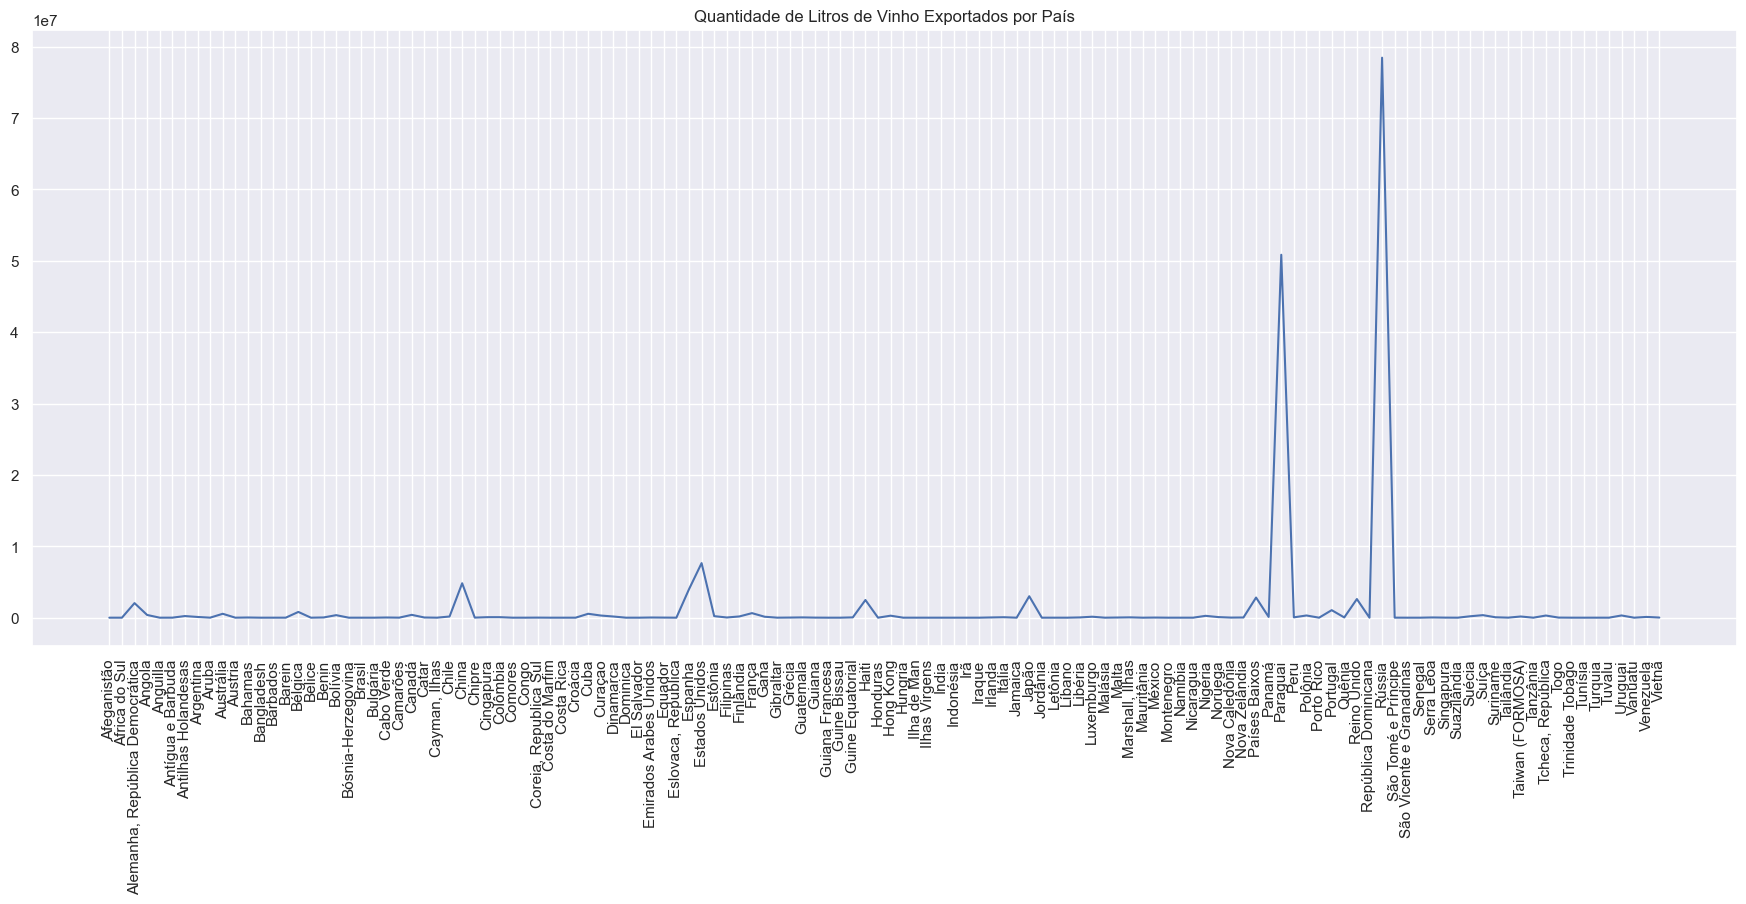

In [488]:
df_vinho_sample = df_exp_vinho_tabela_final
plt.figure(figsize=(22,8))
plt.plot(df_vinho_sample.index, df_vinho_sample['Total em Litros'])
plt.xticks(rotation=90)
plt.title("Quantidade de Litros de Vinho Exportados por País")
plt.show();

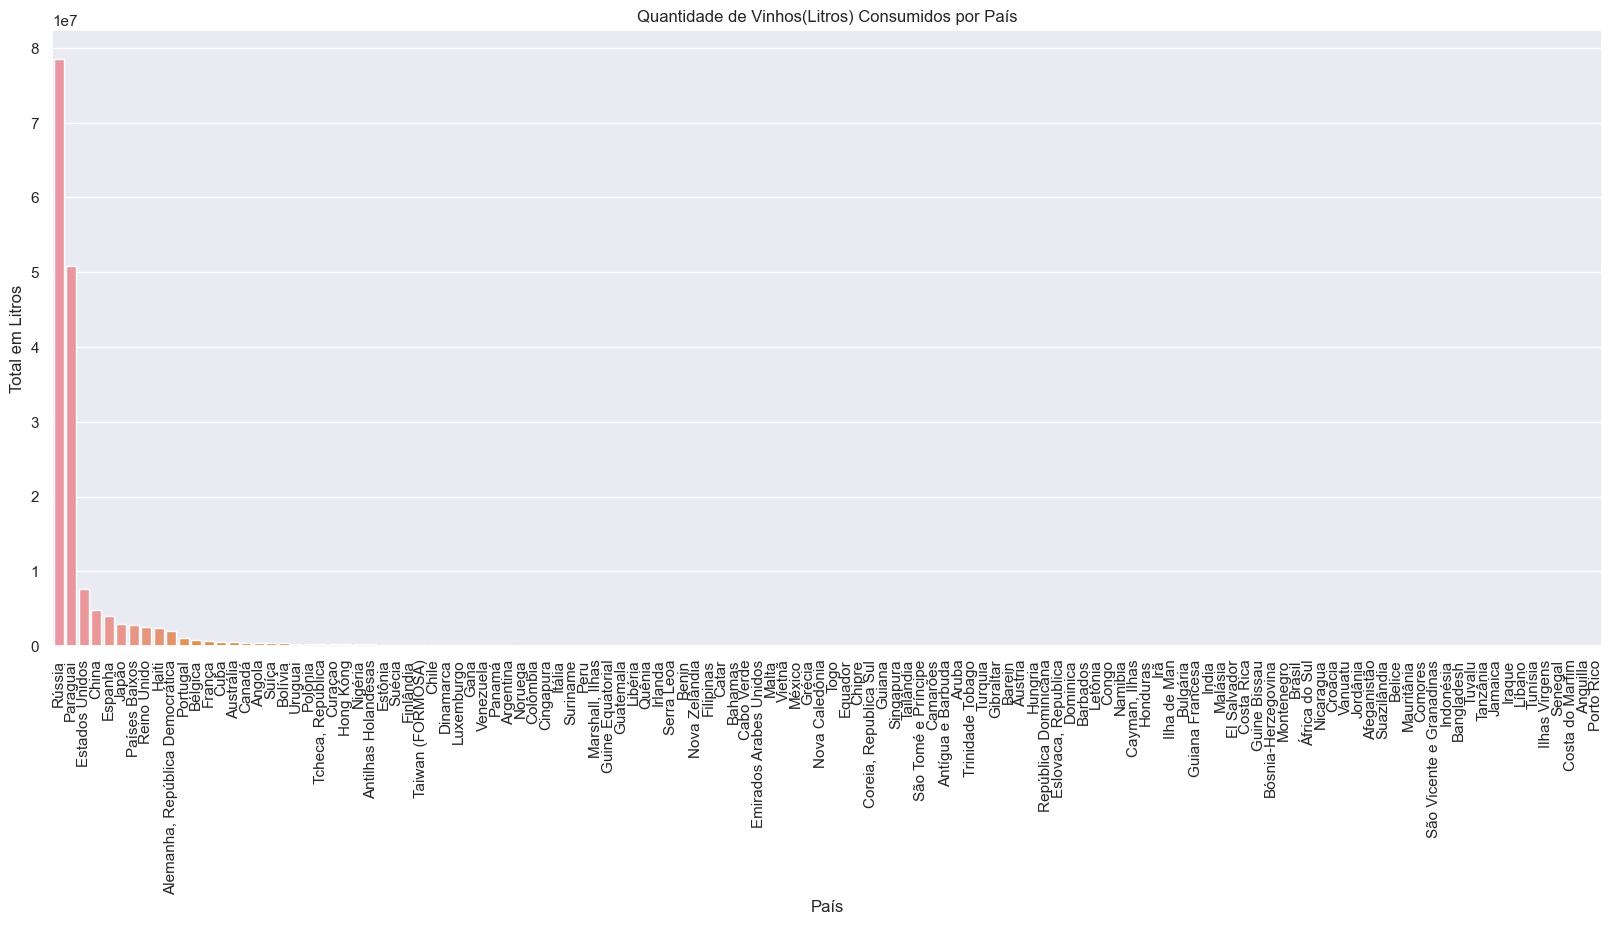

In [489]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_exp_vinho_tabela_final.sort_values(by="Total em Litros", ascending=False), x=df_exp_vinho_tabela_final.sort_values(by="Total em Litros", ascending=False).index, y="Total em Litros").set(title="Quantidade de Vinhos(Litros) Consumidos por País")
plt.xticks(rotation=90)
plt.show();

Apresentamos acima dois tipos de gráficos, sendo:

- Gráfico de Linha;
- Gráfico de Barra;

Agrupamos os dados dos últimos 15 anos, e com base nesses dois gráficos podemos ter algumas percepções:

- Gráfico de Linha  - Traz uma visão estranha de como os dados estão, repare os dados de Panamá, Paraguai e Peru, será que os 3 exportam muito vinho do Brasil? é somente o Paraguai?
- Gráfico de barras - Temos a impressão de que depois da Estônia, nenhum outro país a direita exporta do Brasil, será que é isso mesmo?
- Ambos os gráficos - Não mostram com clareza a percepção de como que está a exportação de vinho, sendo assim, pode ser útil fazer uma divisão dos dados dados por Total de Litros Exportados.

Exemplificando melhor o texto que se refere ao gráfico de barras, mesmo que o gráfico não mostre essa diferença, repare que Equador e Panamá exportam vinho do Brasil, mesmo que não tenhamos essa percepção.

In [490]:
df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida.index == "Panamá") | (df_exp_vinho_tabela_final_resumida.index == "Equador") | (df_exp_vinho_tabela_final_resumida.index == "Líbano")].sort_values(by='Total em Litros')

,Total em Litros,Total em US$
País,,
Líbano,0.0,0.0
Equador,12964.0,7412.0
Panamá,102952.0,114154.0


Conforme analisado anteriormente, percebemos que alguns países estão causando um problema na nossa análise, pois são muito grandes e consideramos como outliers.

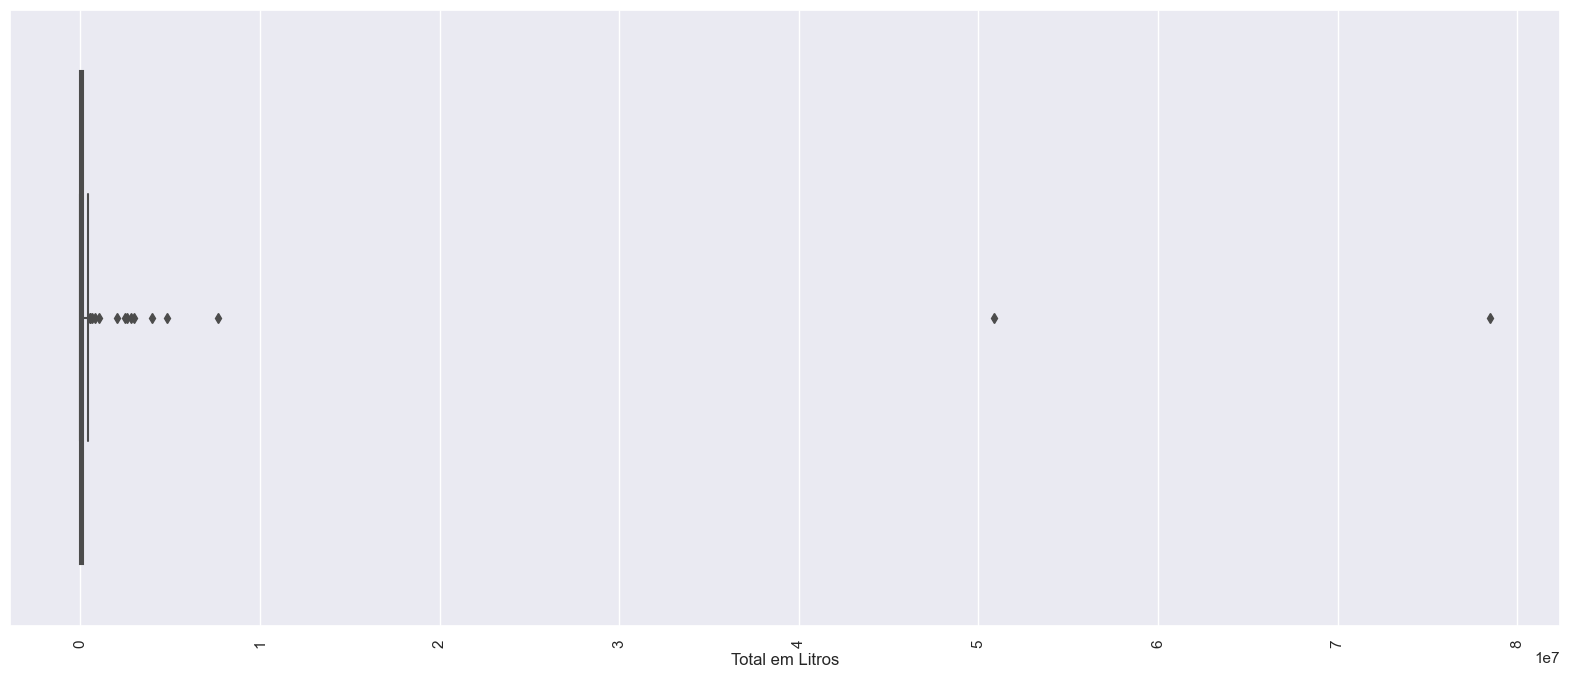

In [491]:
plt.figure(figsize=(20,8))
sns.boxplot(x=df_exp_vinho_tabela_final["Total em Litros"])
plt.xticks(rotation=90)
plt.show();

Repare que os primeiros 5 valores tem uma diferença muito grande no total, sendo assim, os gráficos são empurrados para baixo quando trabalhamos sem fazer uma divisão/separação nessa análise.

In [494]:
df_exp_vinho_tabela_final[['2021', '2021.1']].loc[df_exp_vinho_tabela_final.index == 'Rússia']

,2021,2021.1
País,,
Rússia,181931,312926


In [495]:
df_exp_vinho_tabela_final_resumida.sort_values(by='Total em Litros', ascending=False).head(5)


,Total em Litros,Total em US$
País,,
Rússia,78460306.0,25559026.0
Paraguai,50847118.0,32364257.0
Estados Unidos,7644502.0,10046712.0
China,4823402.0,4372268.0
Espanha,3986000.0,3808552.0


In [38]:
# Subdividiremos essa análise em 4 partes
# 1° Parte - Valores que são iguais a zero
# 2° Parte - Valores maiores que 0  e até 100000
# 3° Parte - Valores de 100000 e até 1000000
# 4° Parte - Valores acima de 1000000

In [496]:
display(df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida["Total em Litros"] == 0 )].shape)
display(df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida["Total em Litros"] > 0) & (df_exp_vinho_tabela_final_resumida["Total em Litros"] <= 100000)].shape)
display(df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida["Total em Litros"] > 100000) & (df_exp_vinho_tabela_final_resumida["Total em Litros"] <= 1000000)].shape)
display(df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida["Total em Litros"] > 1000000)].shape)

(10, 2)

(77, 2)

(26, 2)

(11, 2)

In [497]:
display(HTML('<h3>Países que não exportam ou exportaram do Brasil nos últimos 15 anos.</h3>'))
display(df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida["Total em Litros"] == 0 )])

,Total em Litros,Total em US$
País,,
Anguilla,0.0,0.0
Costa do Marfim,0.0,0.0
Ilhas Virgens,0.0,0.0
Iraque,0.0,0.0
Jamaica,0.0,0.0
Líbano,0.0,0.0
Porto Rico,0.0,0.0
Senegal,0.0,0.0
Tanzânia,0.0,0.0


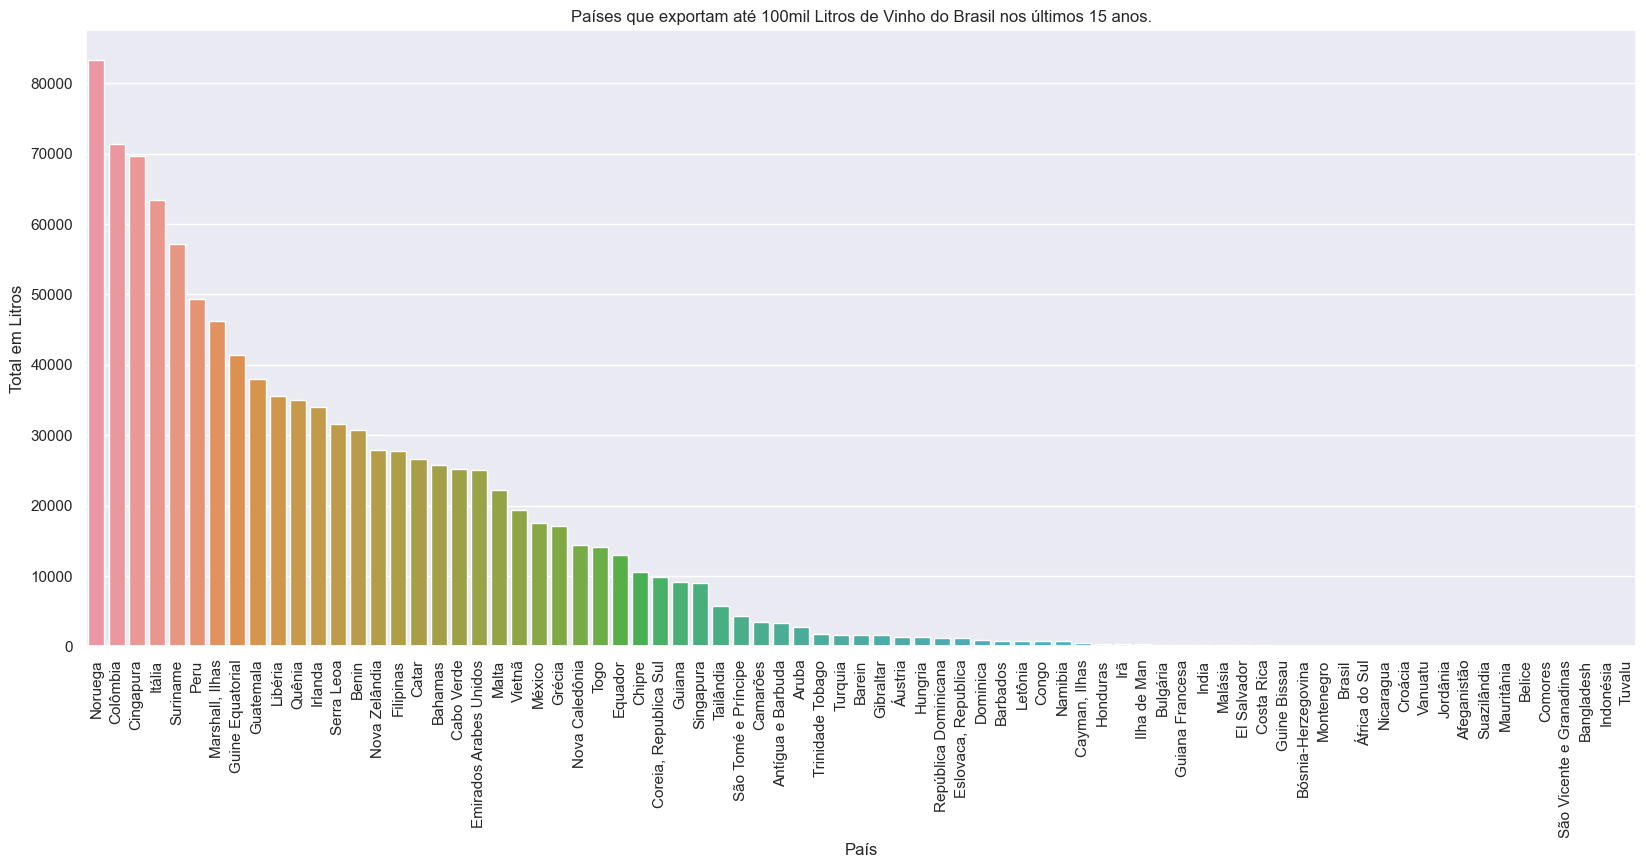

In [498]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida["Total em Litros"] > 0) & (df_exp_vinho_tabela_final_resumida["Total em Litros"] <= 100000)].sort_values(by="Total em Litros", ascending=False), x=df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida["Total em Litros"] > 0) & (df_exp_vinho_tabela_final_resumida["Total em Litros"] <= 100000)].sort_values(by='Total em Litros', ascending=False).index, y="Total em Litros").set(title="Países que exportam até 100mil Litros de Vinho do Brasil nos últimos 15 anos.")
plt.xticks(rotation=90)
plt.show();

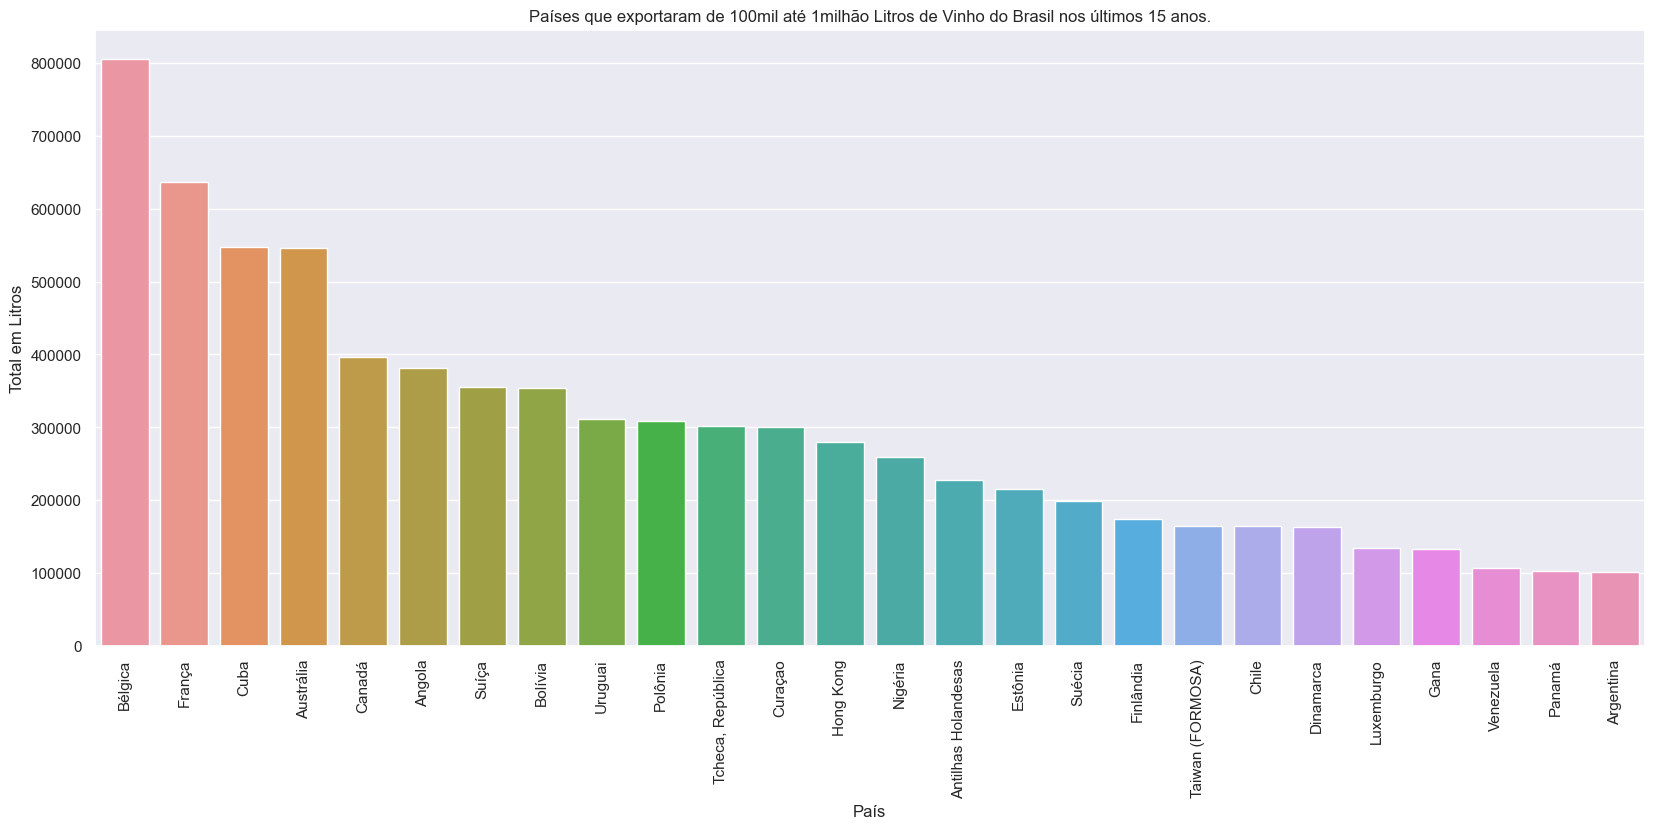

In [499]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida["Total em Litros"] > 100000) & (df_exp_vinho_tabela_final_resumida["Total em Litros"] <= 1000000)].sort_values(by="Total em Litros", ascending=False), x=df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida["Total em Litros"] > 100000) & (df_exp_vinho_tabela_final_resumida["Total em Litros"] <= 1000000)].sort_values(by='Total em Litros', ascending=False).index, y="Total em Litros").set(title="Países que exportaram de 100mil até 1milhão Litros de Vinho do Brasil nos últimos 15 anos.")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show();

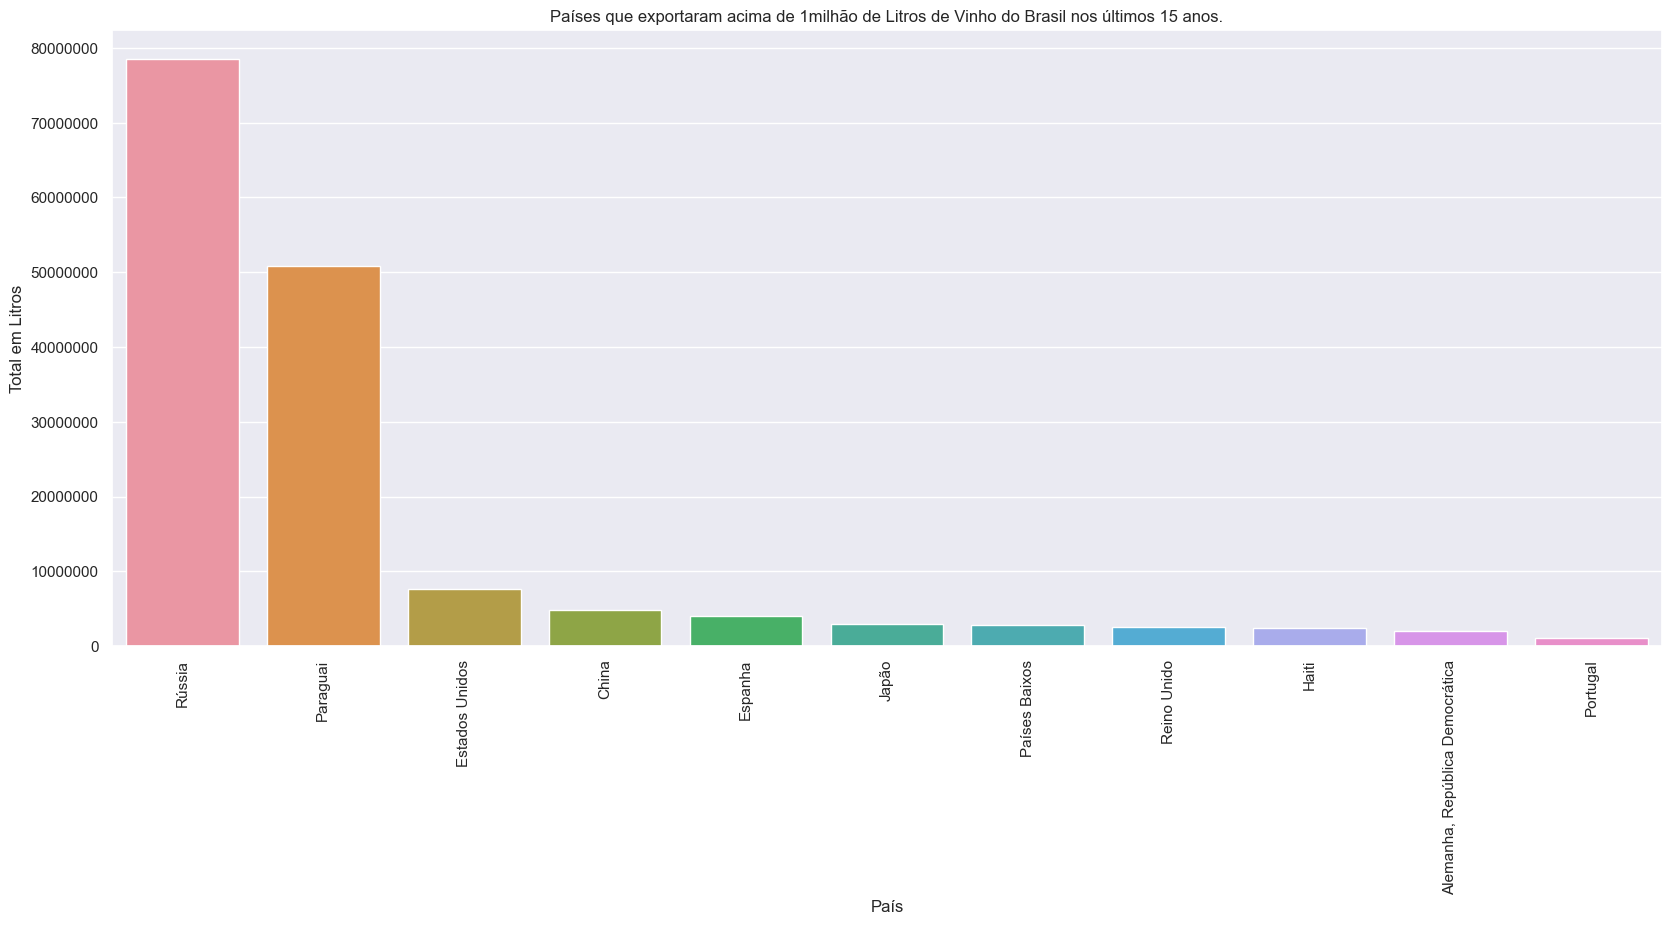

In [500]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida['Total em Litros'] > 1000000)].sort_values(by='Total em Litros', ascending=False), x=df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida['Total em Litros'] > 1000000)].sort_values(by='Total em Litros', ascending=False).index, y="Total em Litros").set(title="Países que exportaram acima de 1milhão de Litros de Vinho do Brasil nos últimos 15 anos.")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show();

#### Total Ganho em Dolar(US$)

In [501]:
df_exp_vinho_tabela_final_resumida.head(2)

,Total em Litros,Total em US$
País,,
Afeganistão,22.0,46.0
África do Sul,60.0,116.0


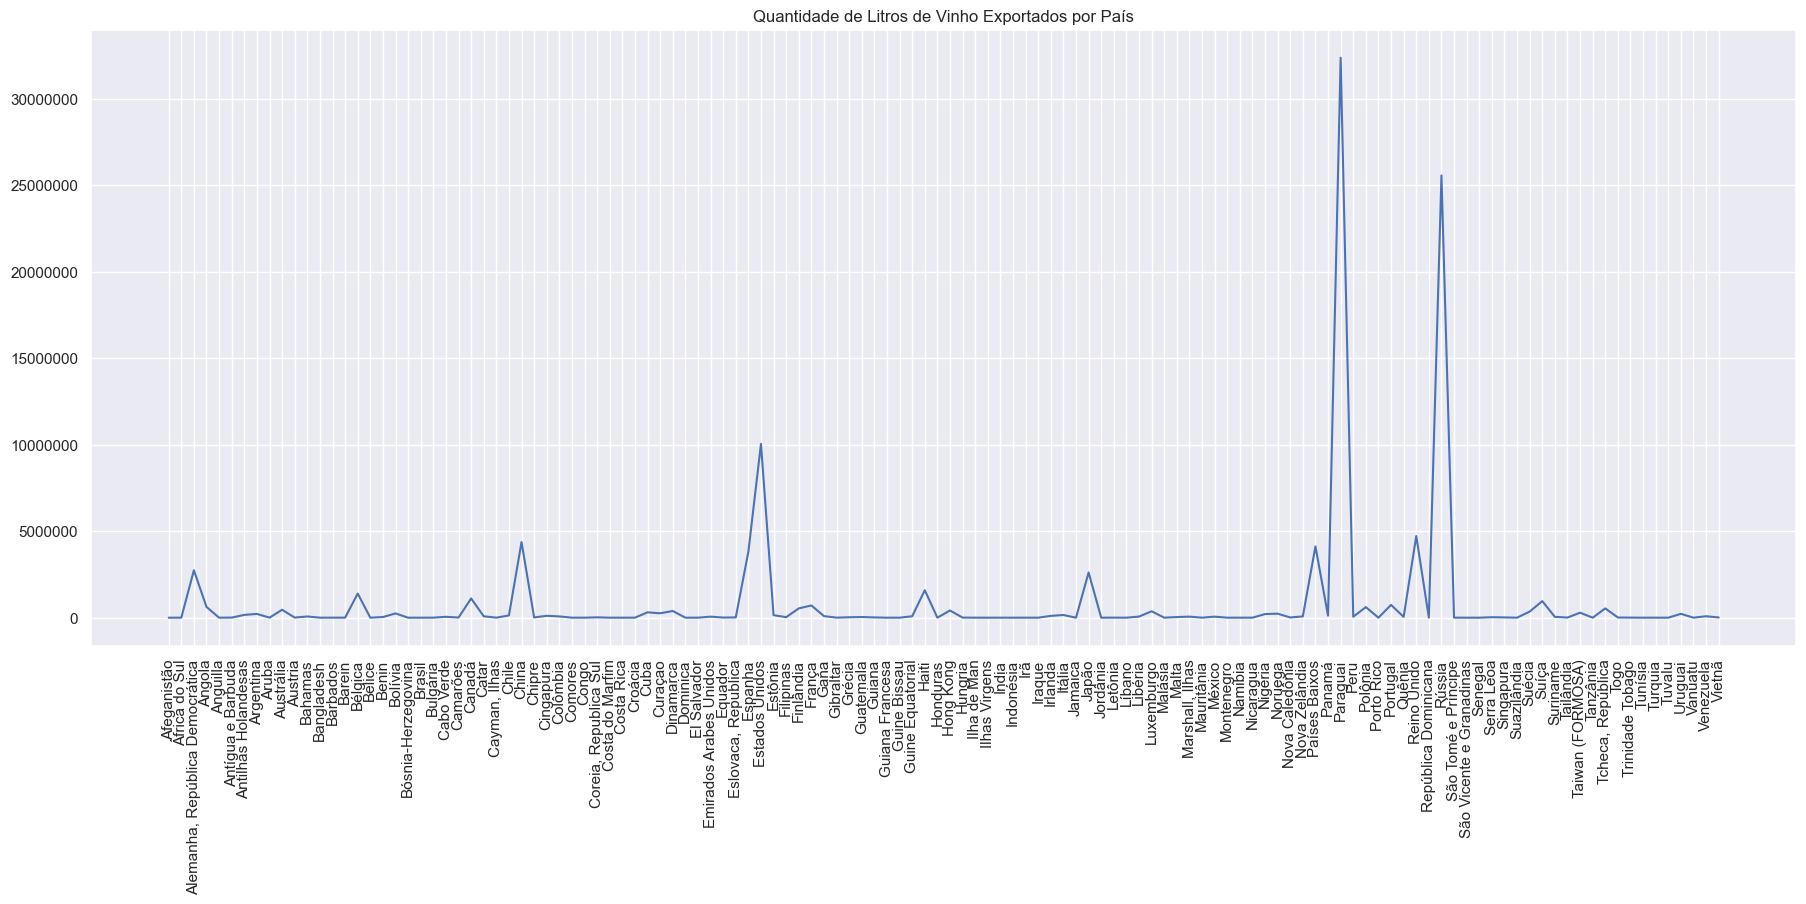

In [502]:
df_vinho_sample = df_exp_vinho_tabela_final
plt.figure(figsize=(22,8))
plt.plot(df_vinho_sample.index, df_vinho_sample['Total em US$'])
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Quantidade de Litros de Vinho Exportados por País")
plt.show();

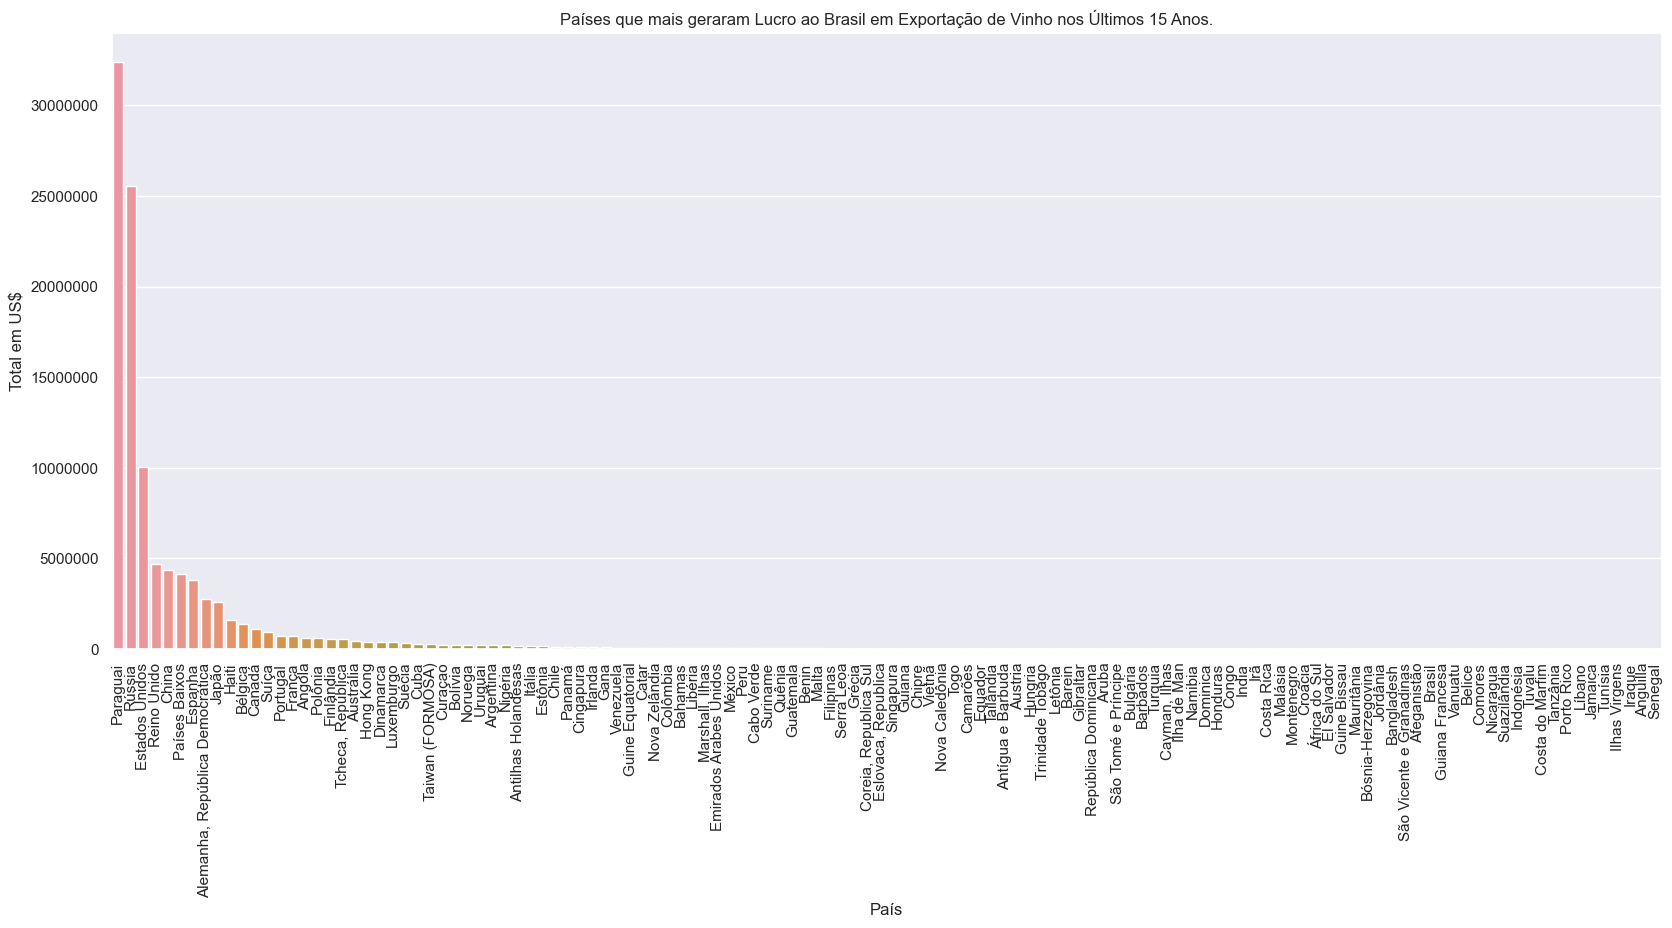

In [503]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_exp_vinho_tabela_final.sort_values(by="Total em US$", ascending=False), x=df_exp_vinho_tabela_final.sort_values(by="Total em US$", ascending=False).index, y="Total em US$").set(title="Países que mais geraram Lucro ao Brasil em Exportação de Vinho nos Últimos 15 Anos.")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show();

In [73]:
# Subdividiremos essa análise em 4 partes
# 1° Parte - Valores que são iguais a zero
# 2° Parte - Valores maiores que 0  e até 100000
# 3° Parte - Valores de 100000 e até 1000000
# 4° Parte - Valores acima de 1000000

In [504]:
display(HTML('<h3>Países que não exportam ou exportaram do Brasil nos últimos 15 anos.</h3>'))
display(df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida["Total em US$"] == 0 )])

,Total em Litros,Total em US$
País,,
Anguilla,0.0,0.0
Costa do Marfim,0.0,0.0
Ilhas Virgens,0.0,0.0
Iraque,0.0,0.0
Jamaica,0.0,0.0
Líbano,0.0,0.0
Porto Rico,0.0,0.0
Senegal,0.0,0.0
Tanzânia,0.0,0.0


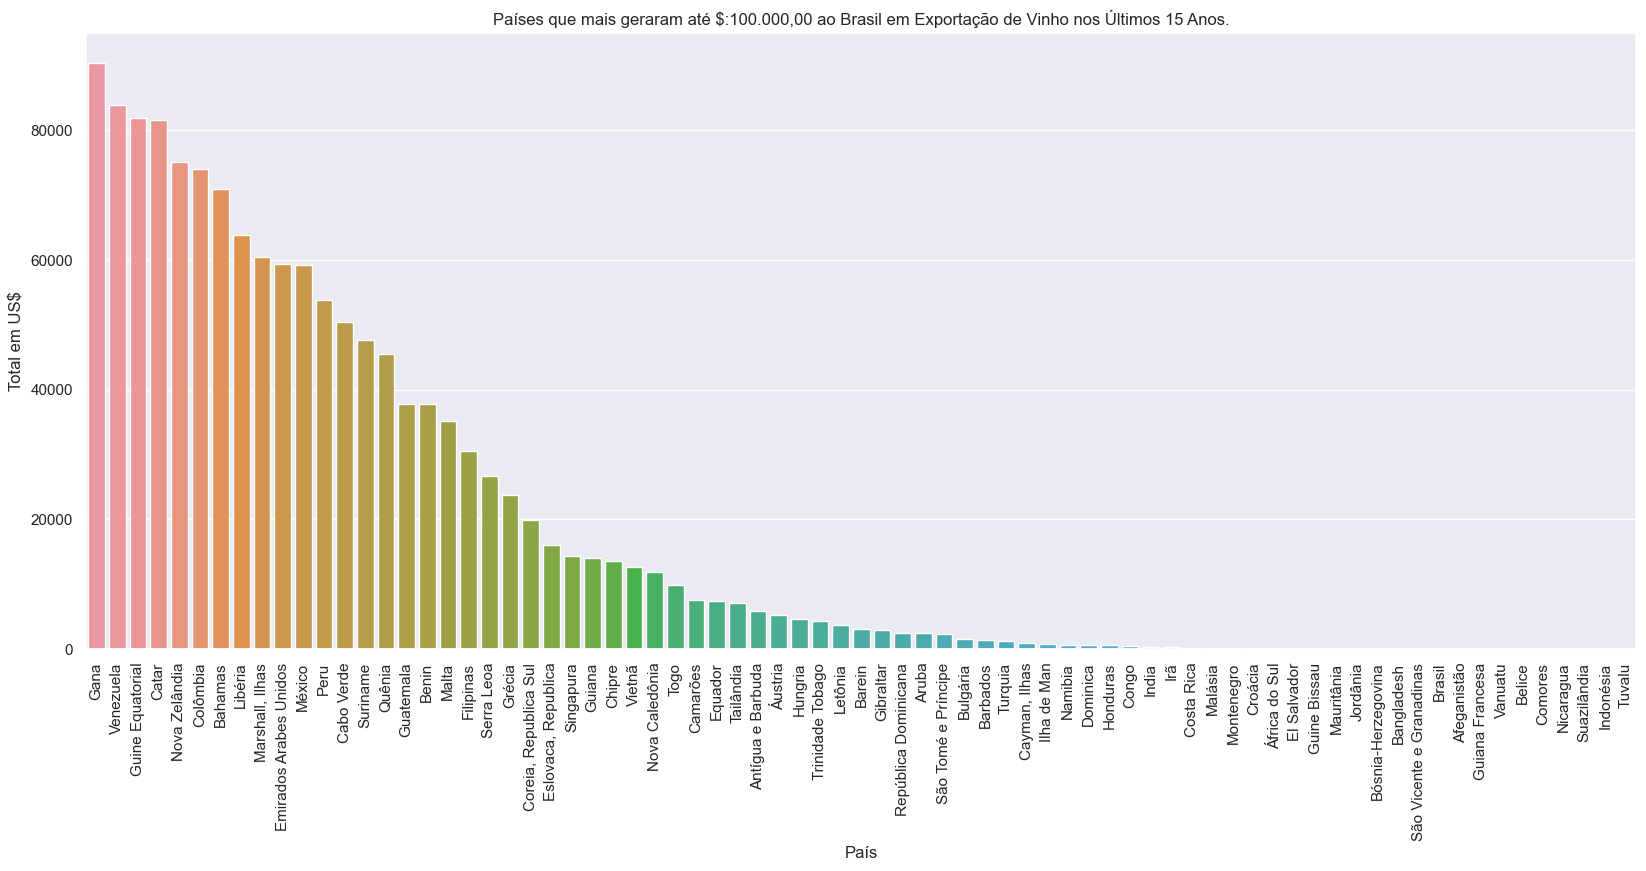

In [505]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida["Total em US$"] > 0) & (df_exp_vinho_tabela_final_resumida["Total em US$"] <= 100000)].sort_values(by="Total em US$", ascending=False), x=df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida["Total em US$"] > 0) & (df_exp_vinho_tabela_final_resumida["Total em US$"] <= 100000)].sort_values(by="Total em US$", ascending=False).index, y="Total em US$").set(title="Países que mais geraram até $:100.000,00 ao Brasil em Exportação de Vinho nos Últimos 15 Anos.")
plt.xticks(rotation=90)
plt.show();

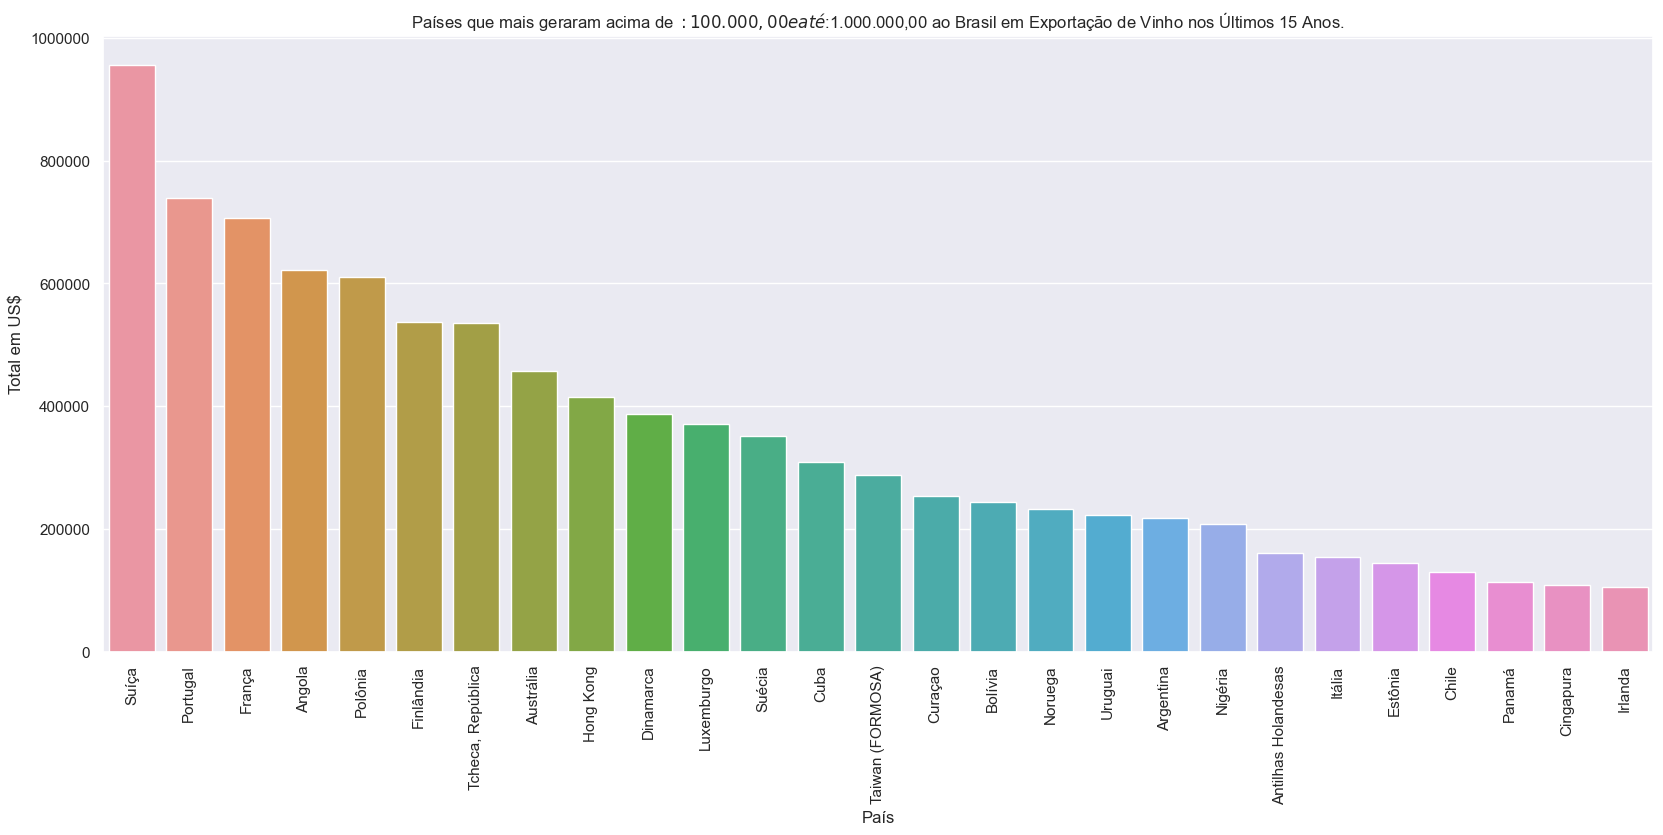

In [506]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida["Total em US$"] > 100000) & (df_exp_vinho_tabela_final_resumida["Total em US$"] <= 1000000)].sort_values(by="Total em US$", ascending=False), x=df_exp_vinho_tabela_final_resumida.loc[(df_exp_vinho_tabela_final_resumida["Total em US$"] > 100000) & (df_exp_vinho_tabela_final_resumida["Total em US$"] <= 1000000)].sort_values(by="Total em US$", ascending=False).index, y="Total em US$").set(title="Países que mais geraram acima de $:100.000,00 e até $:1.000.000,00 ao Brasil em Exportação de Vinho nos Últimos 15 Anos.")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show();

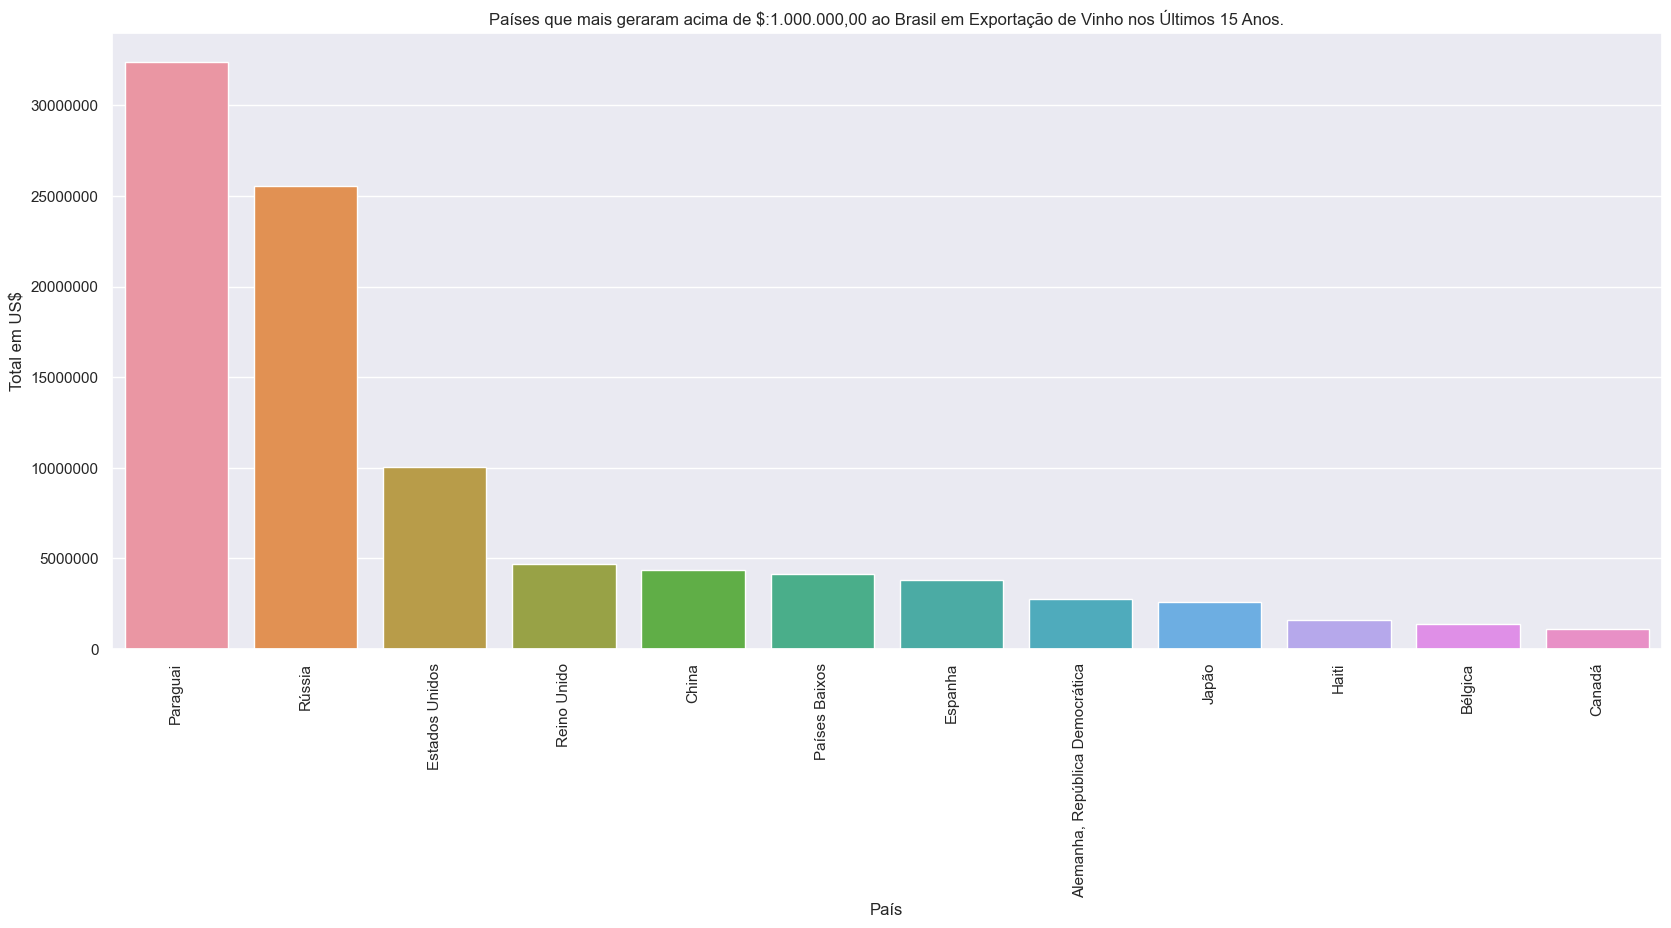

In [507]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_exp_vinho_tabela_final.loc[(df_exp_vinho_tabela_final['Total em US$'] > 1000000)].sort_values(by='Total em US$', ascending=False), x=df_exp_vinho_tabela_final.loc[(df_exp_vinho_tabela_final['Total em US$'] > 1000000)].sort_values(by="Total em US$", ascending=False).index, y="Total em US$").set(title="Países que mais geraram acima de $:1.000.000,00 ao Brasil em Exportação de Vinho nos Últimos 15 Anos.")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show();

## Levantamento de Hipóteses

Conforme analisamos anteriormente, temos dois atributos bem importantes em nossa análise de exportação de Vinho: **Quantidade de Vinho Exportado** e **Total em US$**. Para essa análise, levantamos as seguintes 
hipóteses:

- Qual a correlação em relação a esses dois atributos? Imaginamos que a tendência é de que quanto mais vinho exportado, maior o lucro em relação a exportação, será verdade?
- Sobre os países que mais exportam, Como que estão as importações nos últimos anos?
- o Brasil segue crescendo na exportação ou está em queda?

### Correlação Entre Litros Exportados e Dolar obtido.

In [508]:
df_exp_vinho_tabela_final_resumida.head(2)

,Total em Litros,Total em US$
País,,
Afeganistão,22.0,46.0
África do Sul,60.0,116.0


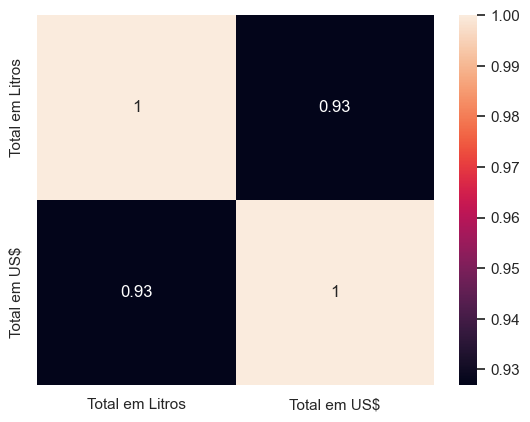

In [509]:
sns.heatmap(df_exp_vinho_tabela_final_resumida.corr(), annot=True);

De acordo com o Coeficiente de correlação de Pearson, temos quase uma correlação perfeita entre os dois atributos analisados acima. Nossa correlação é **muito forte**, ou seja, sempre que o Total de Litros exportado aumenta, a tendência é que o Total em US$ aumente, e assim para o Total em US$ e Total em Litros.

### Exportação de Vinho dos Últimos 15 anos dos 12 países que mais exportam.

In [422]:
colunas_total_litro_por_periodo = df_exp_vinho.columns[1::2]
colunas_total_litro_por_periodo = colunas_total_litro_por_periodo.insert(0, df_exp_vinho.columns[0])
colunas_total_litro_por_periodo

Index(['País', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', 'Produto'],
      dtype='object')

In [424]:
df_exp_vinho_total_litro_por_periodo = df_exp_vinho[colunas_total_litro_por_periodo]

In [425]:
df_exp_vinho_total_litro_por_periodo.drop(columns='Produto', inplace=True)

C:\Users\brcalazans\AppData\Local\Temp\ipykernel_40656\3842563499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_vinho_total_litro_por_periodo.drop(columns='Produto', inplace=True)


In [426]:
new_columns_name = []
for col in df_exp_vinho_total_litro_por_periodo.columns:
    new_columns_name.append(str(col).replace(".1", ""))

In [427]:
df_exp_vinho_total_litro_por_periodo.columns = new_columns_name

In [428]:
df_exp_vinho_total_litro_por_periodo.set_index("País", inplace=True)

In [429]:
df_exp_vinho_total_litro_por_periodo

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,26,4,0
"Alemanha, República Democrática",119512,265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698
Angola,25931,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
Uruguai,0,0,0,914,1238,1135,1526,0,0,0,0,7711,6180,0,136774
Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0


In [430]:
for idx, row in df_exp_vinho_total_litro_por_periodo.iterrows():
    df_exp_vinho_total_litro_por_periodo.loc[df_exp_vinho_total_litro_por_periodo.index == idx, "Total em Litros"] = row.sum()

C:\Users\brcalazans\AppData\Local\Temp\ipykernel_40656\4228961678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_vinho_total_litro_por_periodo.loc[df_exp_vinho_total_litro_por_periodo.index == idx, "Total em Litros"] = row.sum()


In [439]:
df_exp_vinho_total_litro_por_periodo.sort_values(by='Total em Litros', ascending=False)[['2021']].sum()

2021    8058704
dtype: int64

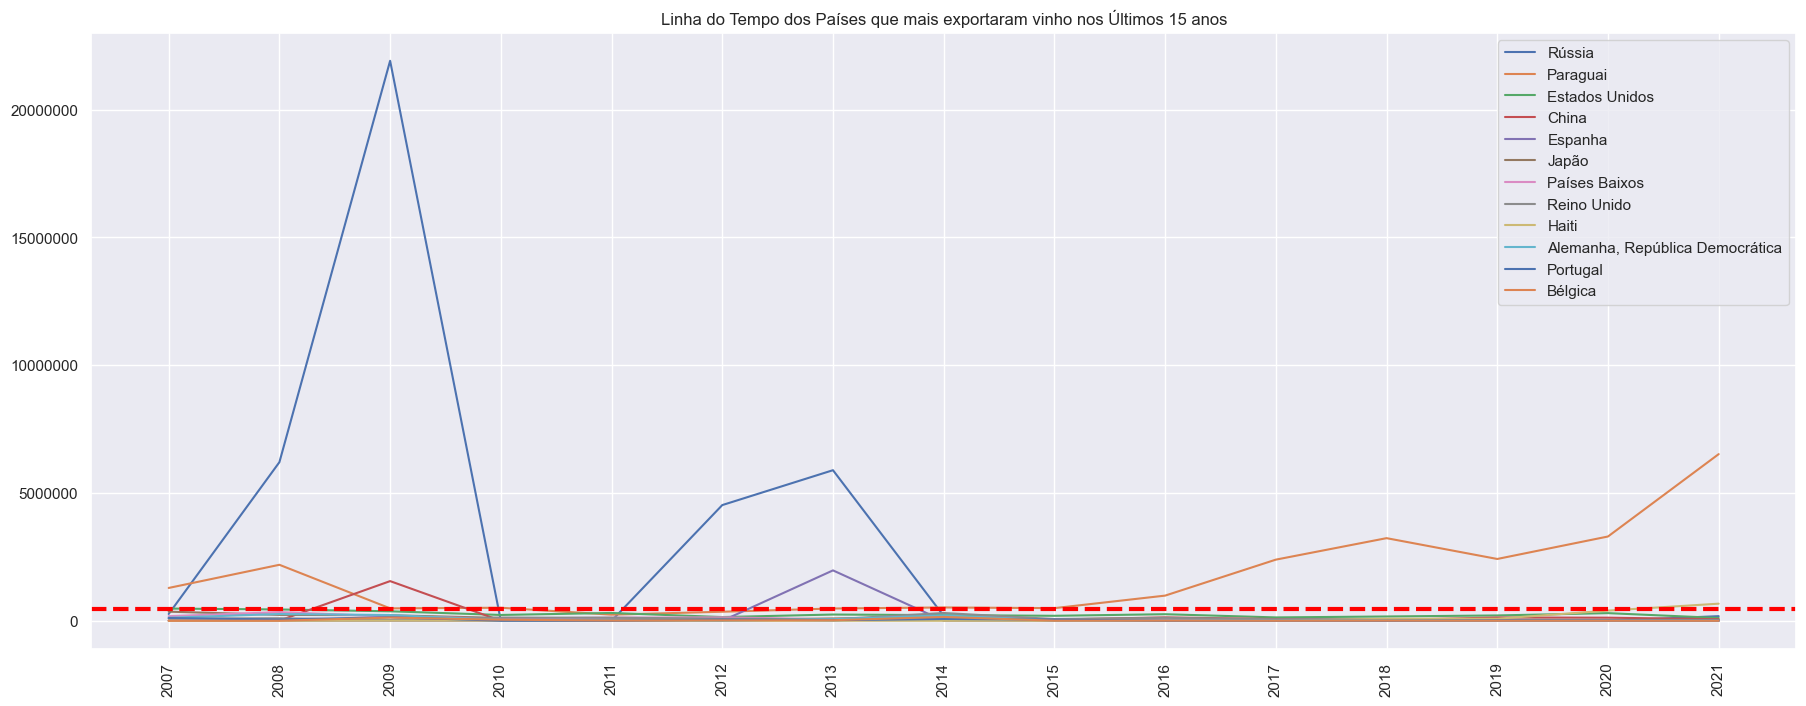

In [432]:
df_sample = df_exp_vinho_total_litro_por_periodo.sort_values(by='Total em Litros', ascending=False).head(12)
df_sample.drop(columns='Total em Litros', inplace=True)
plt.figure(figsize=(22,8))
plt.plot(df_sample.T.index, df_sample.T.values)
plt.legend(df_sample.T.columns[0:12])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.axhline(y=df_sample.T.values.mean(), color='red', linestyle='--', linewidth=3, label='Avg')
plt.title("Linha do Tempo dos Países que mais exportaram vinho nos Últimos 15 anos")
plt.show();

Reparem que dos 12 países que mais exportaram nos 15 anos, apenas no **Paraguai** que percebemos um crescimento bem expressivo, sendo assim, devemos analisar mais detalhamente o motivo desses países diminuirem a exportação.

A linha tracejada mostra a média de exportação desses países, reparem que apenas **Paraguai** e **Haiti** estão acima dessa média.

In [433]:
df_exp_vinho_total_litro_por_periodo.loc[(df_exp_vinho_total_litro_por_periodo.index == "Paraguai") | (df_exp_vinho_total_litro_por_periodo.index == "Haiti")]

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total em Litros
País,,,,,,,,,,,,,,,,
Haiti,0,20,4500,2700,0,0,0,0,0,0,0,79500,81873,399128,670379,1238100.0
Paraguai,1285459,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,25423559.0


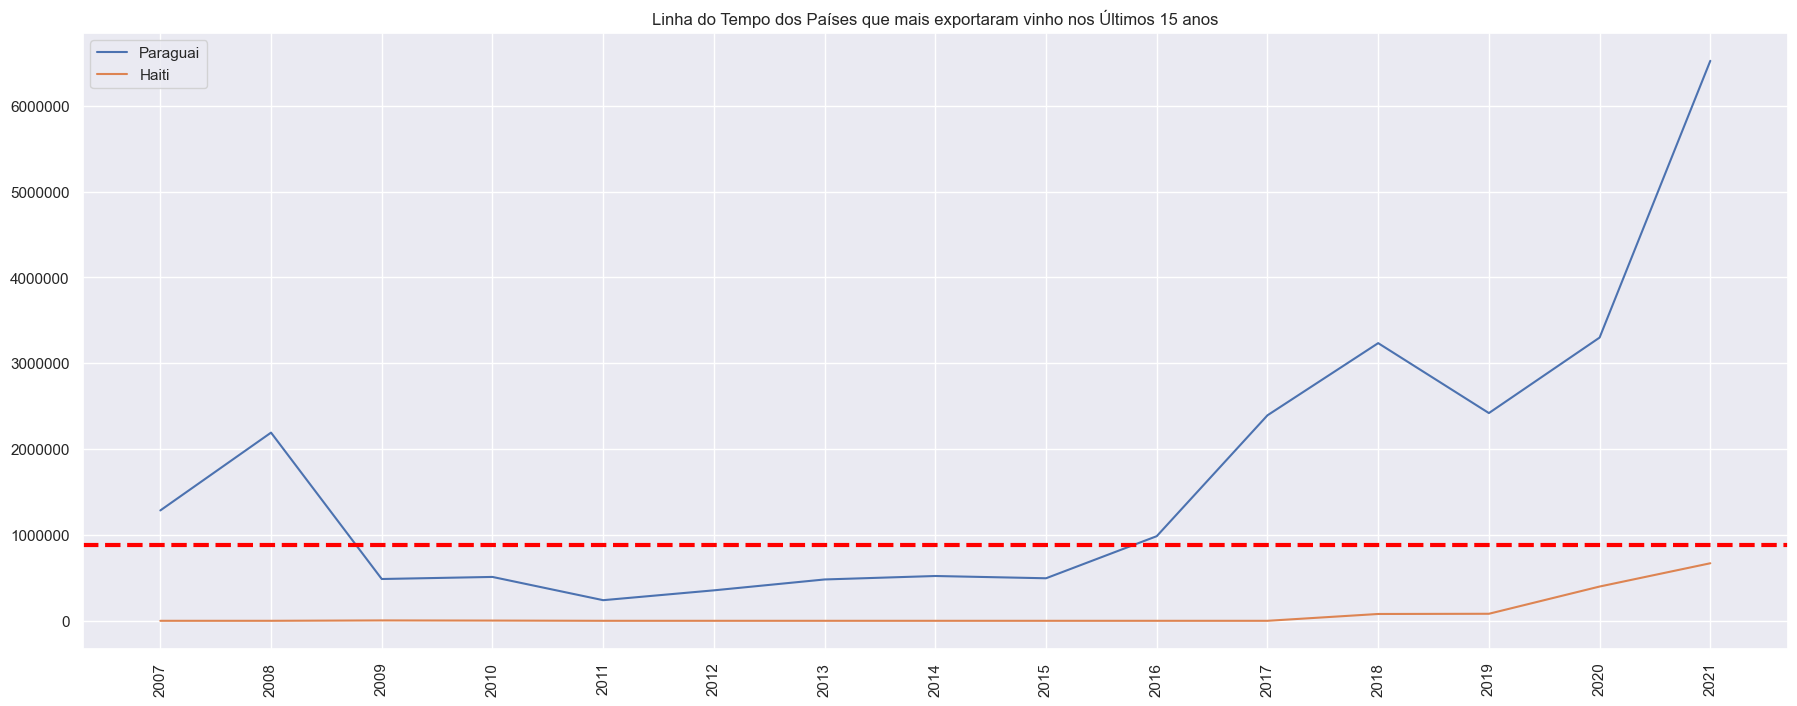

In [434]:
df_sample = df_exp_vinho_total_litro_por_periodo.loc[(df_exp_vinho_total_litro_por_periodo.index == "Paraguai") | (df_exp_vinho_total_litro_por_periodo.index == "Haiti")]
df_sample = df_sample.sort_values(by="Total em Litros")
df_sample.drop(columns='Total em Litros', inplace=True)
plt.figure(figsize=(22,8))
plt.plot(df_sample.sort_values(by=df_sample.columns.tolist(), ascending=False).T.index, df_sample.sort_values(by=df_sample.columns.tolist(), ascending=False).T.values)
plt.legend(df_sample.sort_values(by=df_sample.columns.tolist(), ascending=False).T.columns)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.axhline(y=df_sample.sort_values(by=df_sample.columns.tolist(), ascending=False).T[df_sample.sort_values(by=df_sample.columns.tolist(), ascending=False).index].values.mean(), color='red', linestyle='--', linewidth=3, label='Avg')
plt.title("Linha do Tempo dos Países que mais exportaram vinho nos Últimos 15 anos")
plt.show();

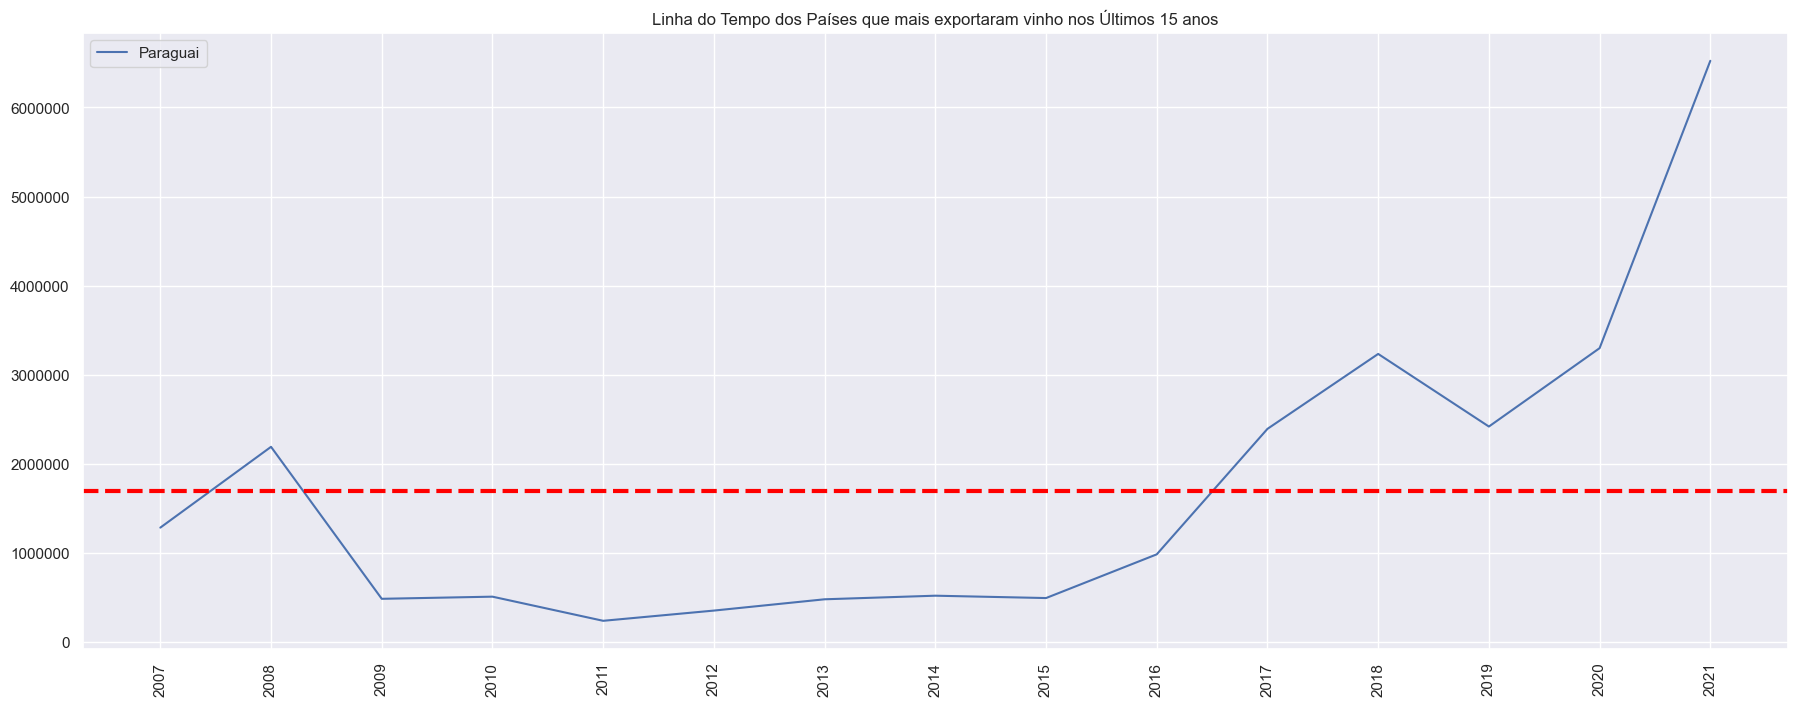

In [435]:
df_sample = df_exp_vinho_total_litro_por_periodo.loc[(df_exp_vinho_total_litro_por_periodo.index == "Paraguai")]
df_sample = df_sample.sort_values(by="Total em Litros")
df_sample.drop(columns='Total em Litros', inplace=True)
plt.figure(figsize=(22,8))
plt.plot(df_sample.sort_values(by=df_sample.columns.tolist(), ascending=False).T.index, df_sample.sort_values(by=df_sample.columns.tolist(), ascending=False).T.values)
plt.legend(df_sample.sort_values(by=df_sample.columns.tolist(), ascending=False).T.columns)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.axhline(y=df_sample.sort_values(by=df_sample.columns.tolist(), ascending=False).T[df_sample.sort_values(by=df_sample.columns.tolist(), ascending=False).index].values.mean(), color='red', linestyle='--', linewidth=3, label='Avg')
plt.title("Linha do Tempo dos Países que mais exportaram vinho nos Últimos 15 anos")
plt.show();

Avaliamos que, dos 12 países que mais exportam, apenas no **Paraguai** que temos um crescimento expressivo de exportação.

### Exportações em Geral nos Últimos 15 anos

In [404]:
df_exportacao_geral_litros = df_exp_vinho.copy()
df_exportacao_geral_valor  = df_exp_vinho.copy()

df_exportacao_geral_litros.drop(columns='Produto', inplace=True)
df_exportacao_geral_valor.drop(columns='Produto', inplace=True)

In [405]:
df_exportacao_geral_valor = df_exportacao_geral_valor[df_exportacao_geral_valor.columns[0::2]]

columns_geral_litros = df_exportacao_geral_litros.columns[1::2]
columns_geral_litros = columns_geral_litros.insert(0, "País")
df_exportacao_geral_litros  = df_exportacao_geral_litros[columns_geral_litros]

In [406]:
new_columns_name = []
for col in df_exportacao_geral_valor.columns:
    new_columns_name.append(str(col).replace(".1", ""))

df_exportacao_geral_valor.columns = new_columns_name

In [407]:
df_exportacao_geral_litros.set_index("País", inplace=True)
df_exportacao_geral_valor.set_index("País", inplace=True)

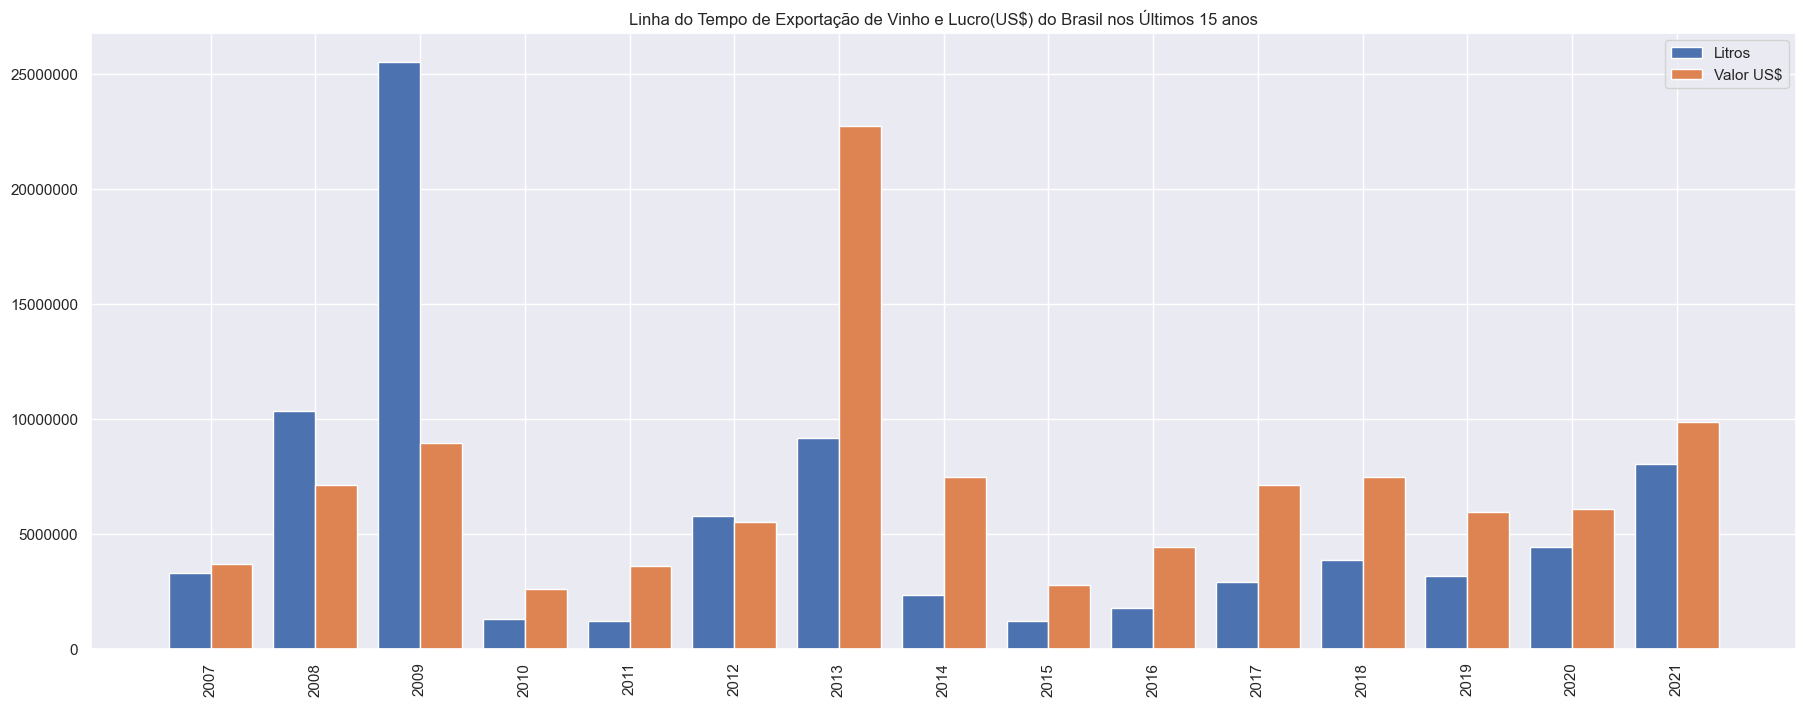

In [411]:
plt.figure(figsize=(22,8))
x_axis = np.arange(len(df_exportacao_geral_litros.sum().index))
plt.bar(x_axis - 0.2, df_exportacao_geral_litros.sum().values,width=0.4, label = "Litros")
plt.bar(x_axis + 0.2, df_exportacao_geral_valor.sum().values,width=0.4,  label="Valor US$")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(x_axis, df_exportacao_geral_litros.sum().index)
plt.xticks(rotation=90)
#plt.axhline(y=df_exportacao_geral_litros.sum().median(), color='red', linestyle='--', linewidth=3, label='Mediana')
#plt.axhline(y=df_exportacao_geral_litros.sum().mean(), color='blue', linestyle='--', linewidth=3, label='Média')
plt.title("Linha do Tempo de Exportação de Vinho e Lucro(US$) do Brasil nos Últimos 15 anos")
plt.legend();
plt.show();

!!!!!! IGNORAR DAQUI PRA BAIXO !!!!!!

In [314]:
for _, row in df_exp_vinho_tabela_final.iterrows():
    df_exp_vinho_tabela_final.loc[df_exp_vinho_tabela_final.index == _, 'lt por dolar'] = round(row['Total em US$'] / row['Total em Litros'], 2)

C:\Users\brcalazans\AppData\Local\Temp\ipykernel_52236\3848712018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_vinho_tabela_final.loc[df_exp_vinho_tabela_final.index == _, 'lt por dolar'] = round(row['Total em US$'] / row['Total em Litros'], 2)
C:\Users\brcalazans\AppData\Local\Temp\ipykernel_52236\3848712018.py:2: RuntimeWarning: invalid value encountered in scalar divide
  df_exp_vinho_tabela_final.loc[df_exp_vinho_tabela_final.index == _, 'lt por dolar'] = round(row['Total em US$'] / row['Total em Litros'], 2)


In [320]:
df_exp_vinho_tabela_final.sort_values(by='lt por dolar', ascending=False)

,Total em Litros,Total em US$,lt por dolar
País,,,
Guiana Francesa,32.0,122.0,3.81
Rússia,25559026.0,64789179.0,2.53
Nicaragua,24.0,48.0,2.00
São Tomé e Príncipe,2357.0,4541.0,1.93
Cuba,309724.0,583421.0,1.88
...,...,...,...
Costa do Marfim,0.0,0.0,NaN
Tunísia,0.0,0.0,NaN
Anguilla,0.0,0.0,NaN


In [ ]:
# 1° Análise do Projeto: Mostrar o quanto capa país exporta do Brasil em Litros.
# 2° Análise do Projeto: Mostrar o quaís países tem gerado mais lucro para o Brasil - Lucro em Dolar. 
# 3° Análise do Projeto: Entender mais sobre os países que não exportam/exportaram do Brasil. PIB?
# 4° Análise do Projeto: Criar gráfico por Região

In [374]:
df_exp_vinho_paraguai = df_exp_vinho.copy()
df_exp_vinho_paraguai = df_exp_vinho_paraguai.set_index("País")
df_exp_vinho_paraguai = df_exp_vinho_paraguai[df_exp_vinho_paraguai.columns[0::2]]
df_exp_vinho_paraguai.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Produto
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,Vinho
África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,26,4,0,Vinho
"Alemanha, República Democrática",119512,265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,Vinho
Angola,25931,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,Vinho
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vinho


In [375]:
df_exp_vinho_paraguai.drop(columns=["Produto"], inplace=True)

In [376]:
df_exp_vinho_paraguai = df_exp_vinho_paraguai.loc[df_exp_vinho_paraguai.index == "Angola"]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '2007'),
  Text(1, 0, '2008'),
  Text(2, 0, '2009'),
  Text(3, 0, '2010'),
  Text(4, 0, '2011'),
  Text(5, 0, '2012'),
  Text(6, 0, '2013'),
  Text(7, 0, '2014'),
  Text(8, 0, '2015'),
  Text(9, 0, '2016'),
  Text(10, 0, '2017'),
  Text(11, 0, '2018'),
  Text(12, 0, '2019'),
  Text(13, 0, '2020'),
  Text(14, 0, '2021')])

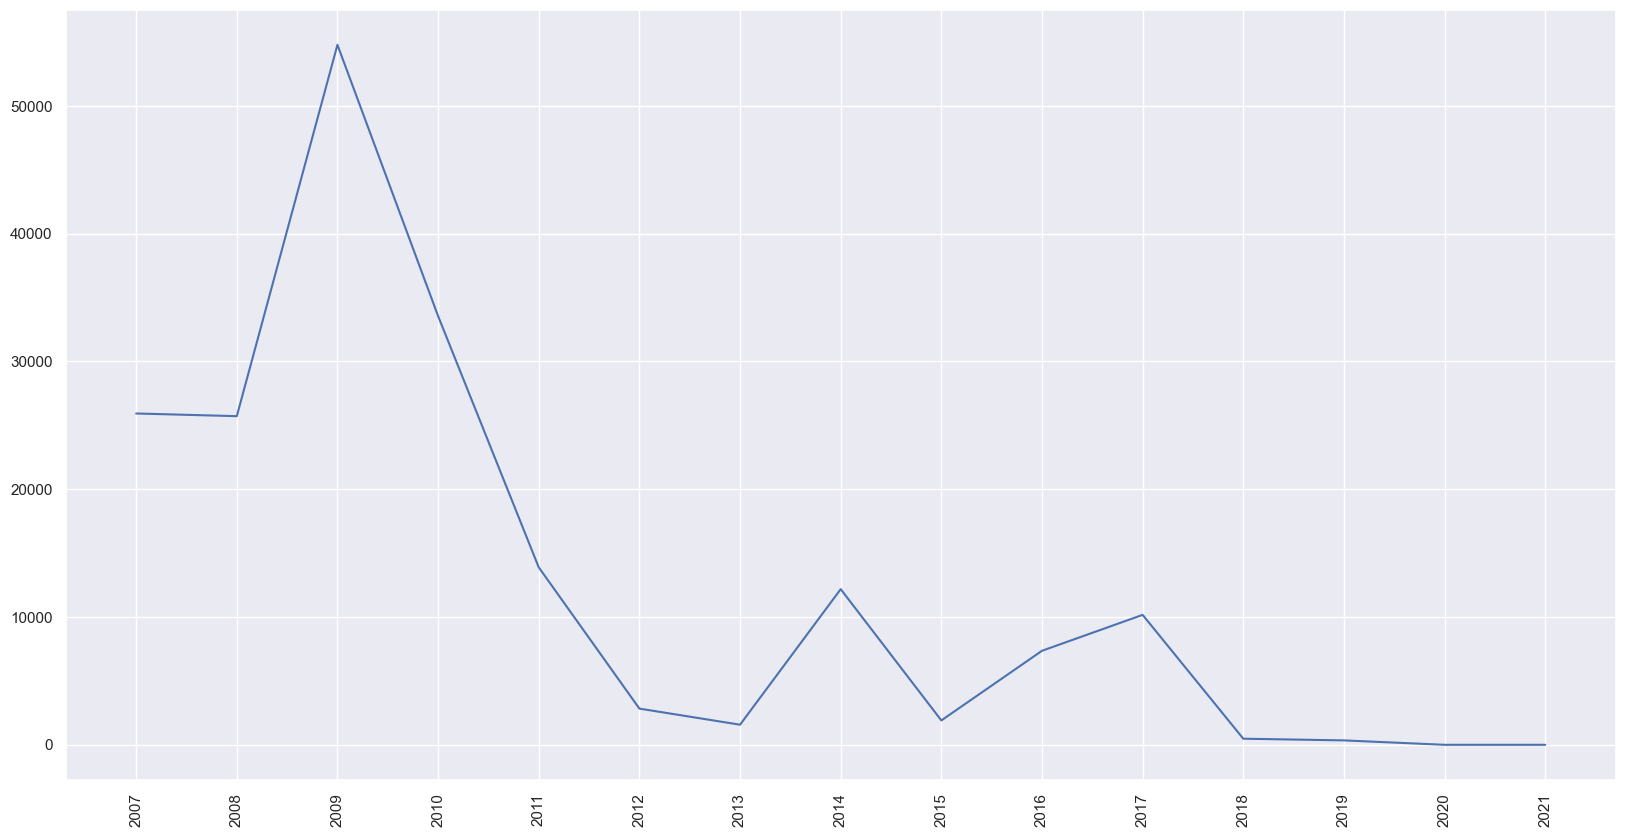

In [377]:
plt.figure(figsize=(20,10))
plt.plot(df_exp_vinho_paraguai.columns.tolist(), df_exp_vinho_paraguai.values.tolist()[0])
plt.xticks(rotation=90)

In [383]:
df_exp_vinho_paraguai.T['Angola'].max()

54786

In [384]:
df_exp_vinho_paraguai.T['Angola'].min()

0

In [391]:
df_exp_vinho_paraguai.T['Angola'].median()

7359.0

In [390]:
df_exp_vinho_paraguai.T['Angola'].describe()

count       15.000000
mean     12715.400000
std      15923.298634
min          0.000000
25%       1025.000000
50%       7359.000000
75%      19805.000000
max      54786.000000
Name: Angola, dtype: float64

<Axes: >

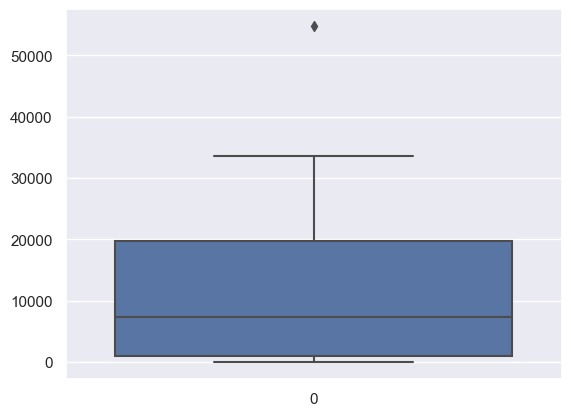

In [389]:
sns.boxplot(df_exp_vinho_paraguai.T['Angola'])

In [401]:
counter_abaixo_media = 0
for _, row in df_exp_vinho_paraguai.T.iterrows():
    media = row.mean()
    print(row)

País
Angola    25931
Name: 2007, dtype: int64
País
Angola    25721
Name: 2008, dtype: int64
País
Angola    54786
Name: 2009, dtype: int64
País
Angola    33557
Name: 2010, dtype: int64
País
Angola    13889
Name: 2011, dtype: int64
País
Angola    2833
Name: 2012, dtype: int64
País
Angola    1573
Name: 2013, dtype: int64
País
Angola    12182
Name: 2014, dtype: int64
País
Angola    1908
Name: 2015, dtype: int64
País
Angola    7359
Name: 2016, dtype: int64
País
Angola    10170
Name: 2017, dtype: int64
País
Angola    477
Name: 2018, dtype: int64
País
Angola    345
Name: 2019, dtype: int64
País
Angola    0
Name: 2020, dtype: int64
País
Angola    0
Name: 2021, dtype: int64


In [398]:
df_exp_vinho_paraguai.T

País,Angola
2007,25931
2008,25721
2009,54786
2010,33557
2011,13889
2012,2833
2013,1573
2014,12182
2015,1908
2016,7359


# Levantamento de Hipóteses

In [ ]:
## Insights Requeridos|Atividades

# Criação da Tabela do Head (País de Origem(Brasil), País de Destino, Quantidade em Litros de Vinho Exportado, Valor em US$)
# Informar o montante de vendas de exportação nos ultimos 15 anos, separados por País
# trazer a prospecção futura
# Trazer possíveis melhorias nas exportações
# Criar gráficos informando os detalhes de cada Insight que iremos gerar



# Tabelas de Exportação - O uso delas será para fazer as atividades principais do projeto, que serão: Criação da tabela, separação dos relatórios por pais, prospecção, possiveis melhorias e gráficos.
# Tabelas de Importação - Comparar com a tabela de exportação

In [ ]:
# Qual o motivo de tantos países não exportarem do Brasil? questão economica? climática?
# Existem países que pararam de exportar do brasil nos últimos 15 anos?
# Avaliar o motivo do Brasil cobrar a exportação bem diferente


dados interessantes: https://winefun.com.br/consumo-de-vinho-brasil-consolida-posicao-em-2021-ano-marcado-por-reviravoltas/